In [2]:
# retina display
%config InlineBackend.figure_format = 'retina'

In [3]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

WD = Path.cwd()
OUTDIR = WD / 'out'

input_file = '/Users/hbahk/Research/kspec/taipansample/FirstTestSet/2021Feb08/ccd_1/08feb10093.fits'
# hdu = fits.open('/Users/hbahk/Research/kspec/taipansample/FirstTestSet/2021Feb08/ccd_1/08feb10249.fits') # obj
hdu = fits.open(input_file) # flat
hdu.info()

Filename: /Users/hbahk/Research/kspec/taipansample/FirstTestSet/2021Feb08/ccd_1/08feb10093.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      98   (2048, 2098)   int16 (rescales to uint16)   
  1  STRUCT.MORE.FIBRES    1 BinTableHDU     96   300R x 23C   [80A, 1D, 1D, 1D, 1D, 1D, 1D, 1J, 1J, 1D, 1I, 1I, 1A, 1J, 1J, 1I, 1I, 1I, 1D, 80A, 1D, 1D, 20A]   


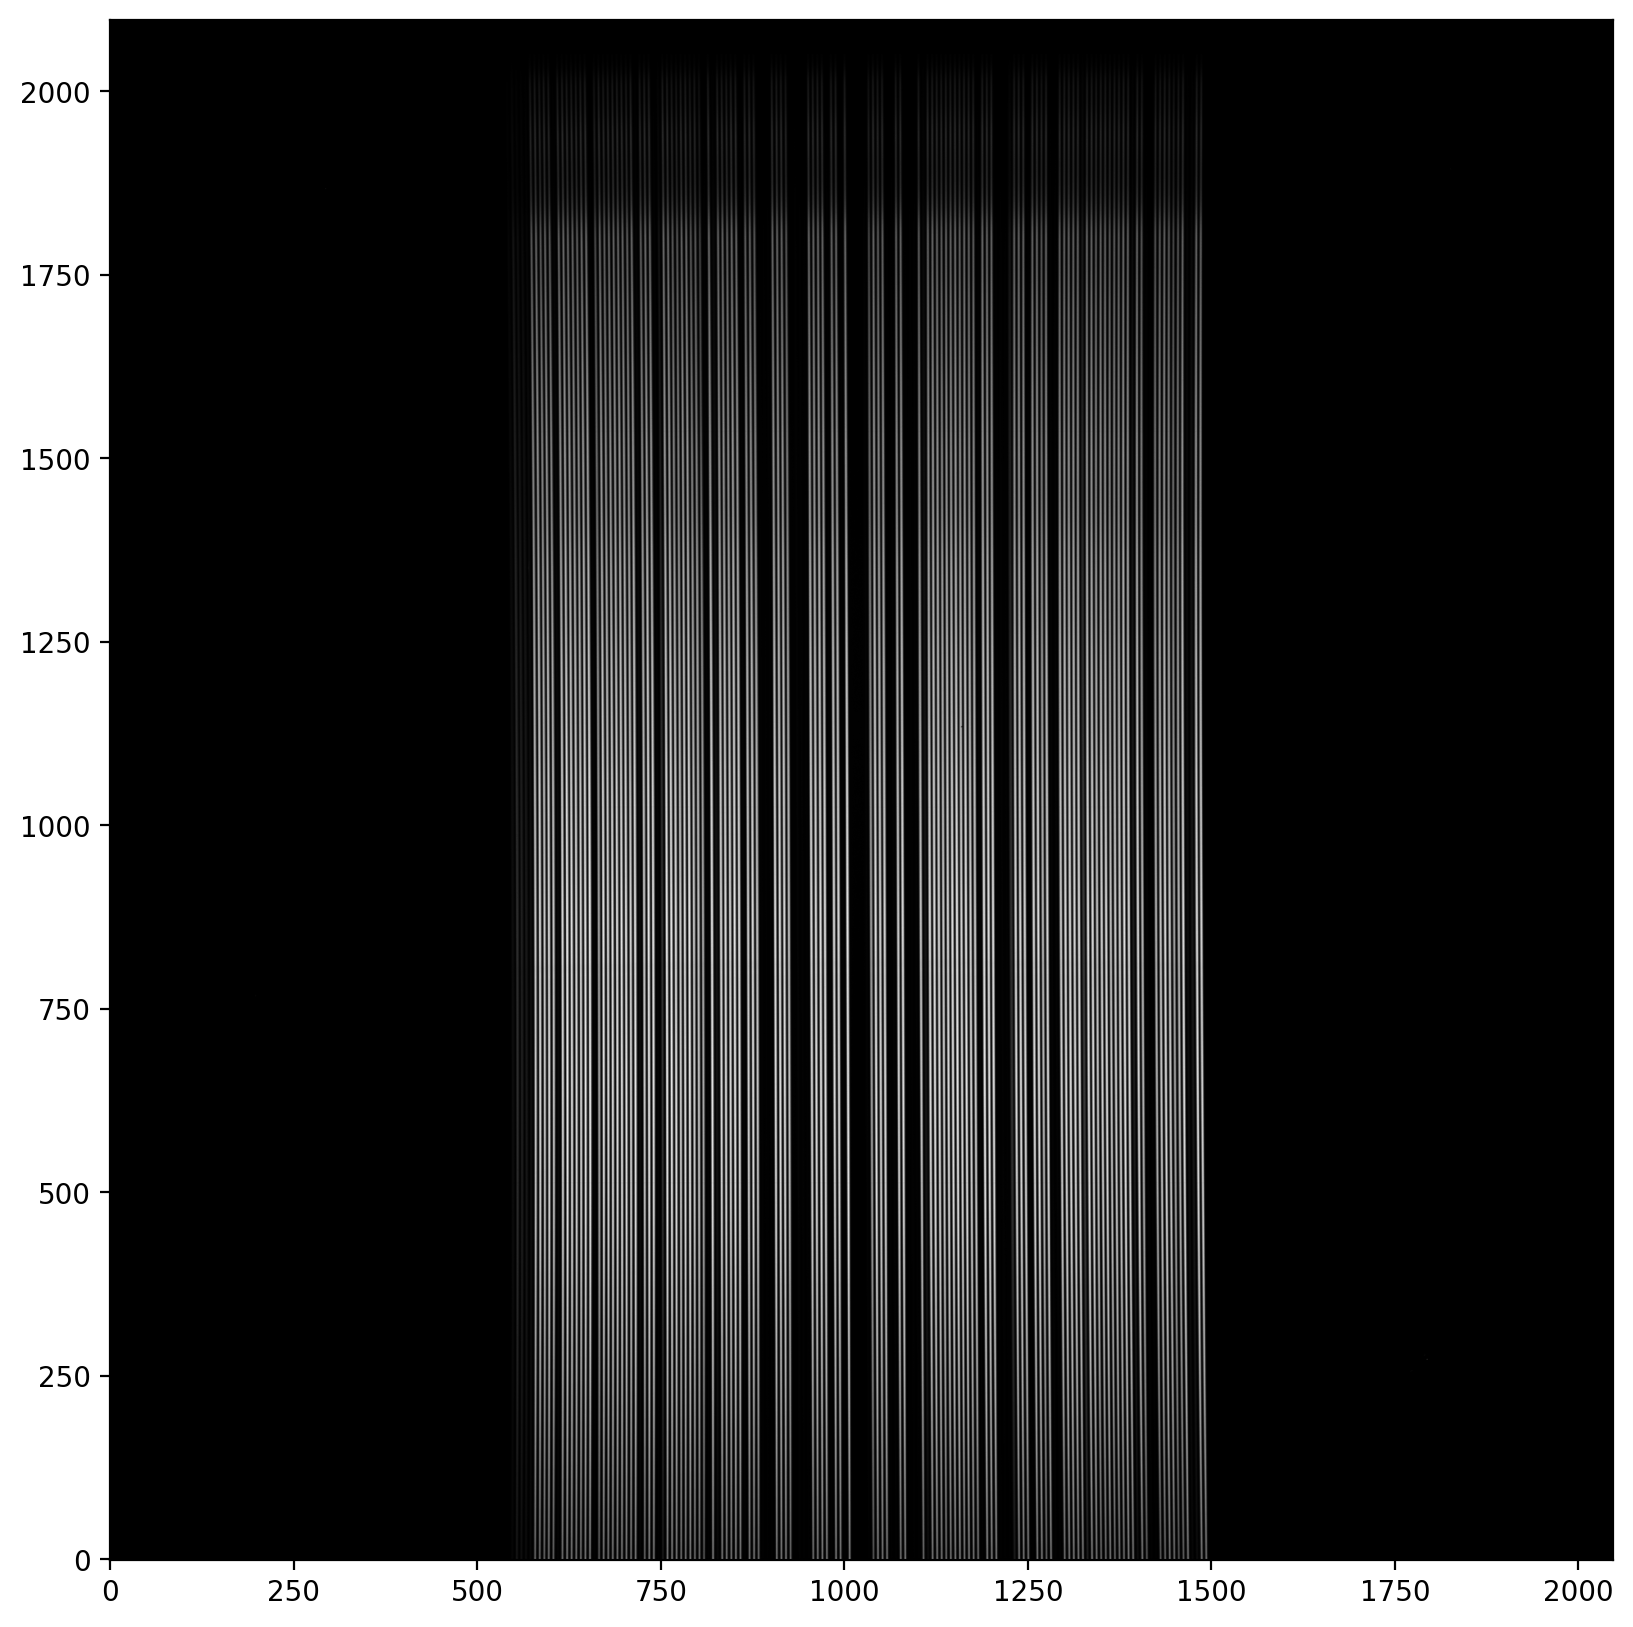

In [4]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.imshow(hdu[0].data, cmap='gray', origin='lower')

In [5]:
from astropy.table import Table
fibermap = Table(hdu[1].data)

In [6]:
hdu[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                  287 / width of table in bytes                        
NAXIS2  =                  300 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   23 / number of fields in each row                   
TTYPE1  = 'NAME    '           / label for field   1                            
TFORM1  = '80A     '           / data format of field: ASCII Character          
TTYPE2  = 'RA      '           / label for field   2                            
TFORM2  = '1D      '           / data format of field: 8-byte DOUBLE            
TTYPE3  = 'DEC     '        

In [7]:
fibermap.show_in_notebook(display_length=10)

         interactive tables it is recommended to use dedicated tools like:
         - https://github.com/bloomberg/ipydatagrid
         - https://docs.bokeh.org/en/latest/docs/user_guide/interaction/widgets.html#datatable
         - https://dash.plotly.com/datatable [warnings]


idx,NAME,RA,DEC,RA_DEG,DEC_DEG,RA_ACT,DEC_ACT,X,Y,ROTATION,XERR,YERR,TYPE,BUGID,BUGSRL,SUCCESS,PRIORITY,ASSIGNED,MAGNITUDE,COMMENT,PMRA_AS,PMDEC_AS,PROGRAM
0,NO FIBRE IN THIS POSITION,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,N,0,0,0,0,0,0.0,,0.0,0.0,
1,NO FIBRE IN THIS POSITION,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,N,0,0,0,0,0,0.0,,0.0,0.0,
2,NO FIBRE IN THIS POSITION,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,N,0,0,0,0,0,0.0,,0.0,0.0,
3,NO FIBRE IN THIS POSITION,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,N,0,0,0,0,0,0.0,,0.0,0.0,
4,NO FIBRE IN THIS POSITION,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,N,0,0,0,0,0,0.0,,0.0,0.0,
5,AT NOMINAL HOME AFTER DEPLOY,0.0,0.0,0.0,0.0,0.0,0.0,-112600,-91800,0.0,0,0,P,18,264,0,0,0,0.0,,0.0,0.0,
6,AT NOMINAL HOME AFTER DEPLOY,0.0,0.0,0.0,0.0,0.0,0.0,-96200,-96200,0.0,0,0,P,19,113,0,0,0,0.0,,0.0,0.0,
7,AT NOMINAL HOME AFTER DEPLOY,0.0,0.0,0.0,0.0,0.0,0.0,-79700,-100600,0.0,0,0,P,20,418,0,0,0,0.0,,0.0,0.0,
8,AT NOMINAL HOME AFTER DEPLOY,0.0,0.0,0.0,0.0,0.0,0.0,-63300,-105000,0.0,0,0,P,21,224,0,0,0,0.0,,0.0,0.0,
9,AT NOMINAL HOME AFTER DEPLOY,0.0,0.0,0.0,0.0,0.0,0.0,-46900,-109400,0.0,0,0,P,22,279,0,0,0,0.0,,0.0,0.0,


In [8]:
np.unique(fibermap['TYPE'].data)

array(['N', 'P'], dtype='<U1')

In [9]:
nomfpos_red = np.array([
    548., 554.415344, 560.507996, 566.709839, 573., 579.097046, 585.320740,
    591.528015, 597.549622, 603.798462, 610., 616.079102, 622.334167,
    628.491089, 634.729492, 640.913086, 647.033264, 653.222412, 659.5,
    665.563538, 671.694092, 677.911255, 684.061951, 690.304565, 696.443054,
    702.534241, 708.772766, 714.884705, 721., 727.249146, 733.341736,
    739.529480, 746., 751.851318, 758.015747, 764.200806, 770.319336,
    776.525818, 782.574280, 788.812134, 794.984009, 801.162476, 807.354126,
    813., 819.549316, 825.657959, 831.969055, 838.006287, 844.259216,
    850.375244, 856.564392, 863., 868.844177, 875.013428, 881.087463,
    887., 893., 899., 905.714539, 911.940918, 918.076904, 924.302673,
    930., 936., 942., 948., 954.951172, 961.064453, 967.360107, 973.398438,
    979., 985.755920, 991.855408, 998., 1004.15778, 1030., 1036.33142,
    1042.43713, 1048.64746, 1054.70422, 1061., 1067., 1073.21948,
    1079.31677, 1085., 1091., 1097., 1103.96448, 1110.24121, 1116.27808,
    1122.44165, 1128.58093, 1134.69580, 1140.87122, 1147.02026, 1153.21191,
    1159.30164, 1165.45300, 1171.69958, 1177.81079, 1184., 1190.13293,
    1196.28943, 1202.38770, 1208., 1214., 1220., 1227.18372, 1233.18311,
    1239.37463, 1245.53088, 1251., 1257.85986, 1263.98279, 1270.17651,
    1276.32129, 1282., 1288., 1294.80042, 1300.98804, 1307.11743, 1313.31445,
    1319.41931, 1325.69397, 1331.74255, 1337.94006, 1344.04761, 1350.33093,
    1356.40161, 1362.64661, 1368.79590, 1374.89453, 1381.08521, 1387.26904,
    1393.47388, 1399.69324, 1405.78491, 1412., 1418., 1424.37390,
    1430.52942, 1436.69763, 1442.84387, 1448.96619, 1455.29272, 1461.40161,
    1467., 1473.76782, 1479.96619, 1486.11108
])

In [10]:
nomfpos_blue = np.array([
    565.343628, 571.655884, 577.861572, 584.065796, 589.641113, 595.957336,
    602.231201, 608.371765, 614.411743, 620.749573, 626, 632.793701,
    639.087036, 645.208252, 651.420532, 657.547607, 663.671570, 669.952271,
    676, 681.933960, 688.172058, 694.366150, 700.513855, 706.735046,
    712.823547, 718.915894, 725.081604, 731.275696, 737, 743.316589,
    749.537659, 755.790466, 763, 767.631348, 773.999756, 780.220886,
    786.367615, 792.487915, 798.440247, 804.772705, 810.909363, 817.038330,
    823.256287, 829, 835.299438, 841.590454, 847.676331, 854, 860,
    865.925476, 872.230347, 878, 884.218445, 890.464966, 896.668518,
    903, 909, 915, 920.936218, 927.227478, 933.370605, 939.640625,
    946, 951.570618, 958, 964, 970.051086, 976, 982.275146,
    988.507690, 995, 1000.58307, 1006.85590, 1013, 1018.99005,
    1045, 1050.81653, 1057.02307, 1063.32983, 1069, 1075, 1081,
    1087.57166, 1093.83447, 1100, 1106, 1112, 1118.17883, 1124.06311,
    1130.43115, 1136.64307, 1142.86267, 1147, 1154.90137, 1161.09888,
    1167.25354, 1173.31445, 1179.45752, 1185.63171, 1191.83582, 1198,
    1203.88940, 1210.10315, 1216.29309, 1224, 1230, 1236, 1240.30908,
    1246.75598, 1252.96777, 1259.18042, 1265, 1271.22607, 1277.44702,
    1283.58691, 1289.77917, 1296, 1302, 1307.97559, 1314.21069,
    1320.29944, 1326.47876, 1332.65381, 1338.69946, 1344.74951,
    1350.98743, 1357.06653, 1363.25598, 1369.33936, 1375.62256, 1381,
    1387.59753, 1393.87598, 1400.12061, 1406.18933, 1412.31274,
    1418.57104, 1425, 1431, 1436.83557, 1443.02356, 1449.17566,
    1455.32031, 1461.39673, 1467.59204, 1473.84741, 1480.26318,
    1485.60266, 1492.09705, 1498.36023
])

In [11]:
len(nomfpos_red)

150

(1998.0, 2048.0)

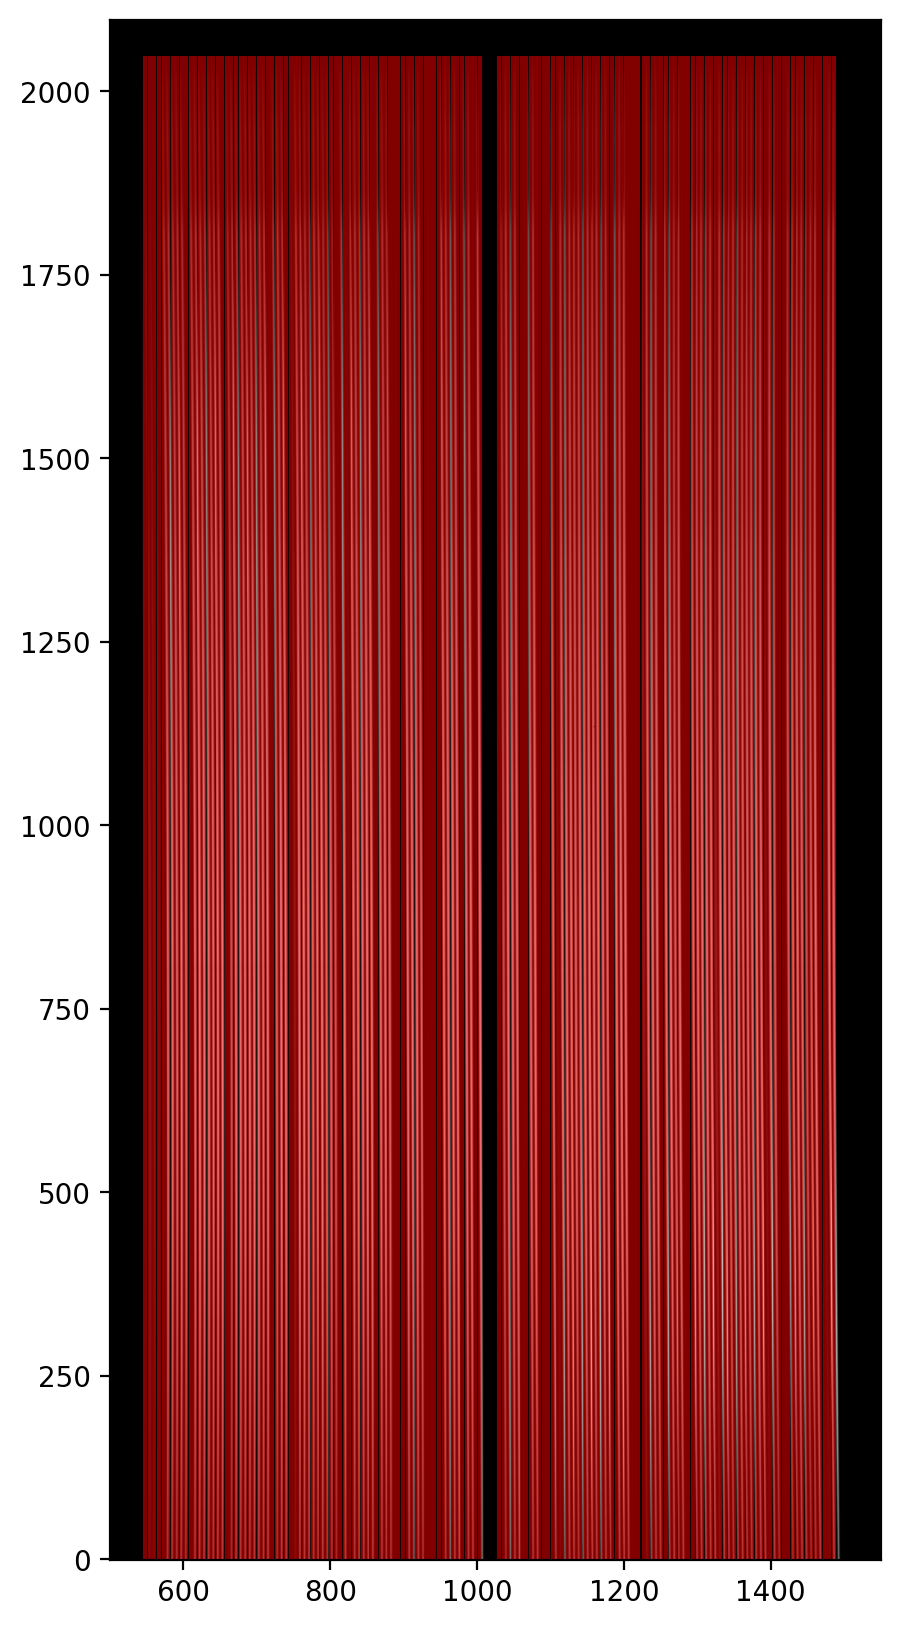

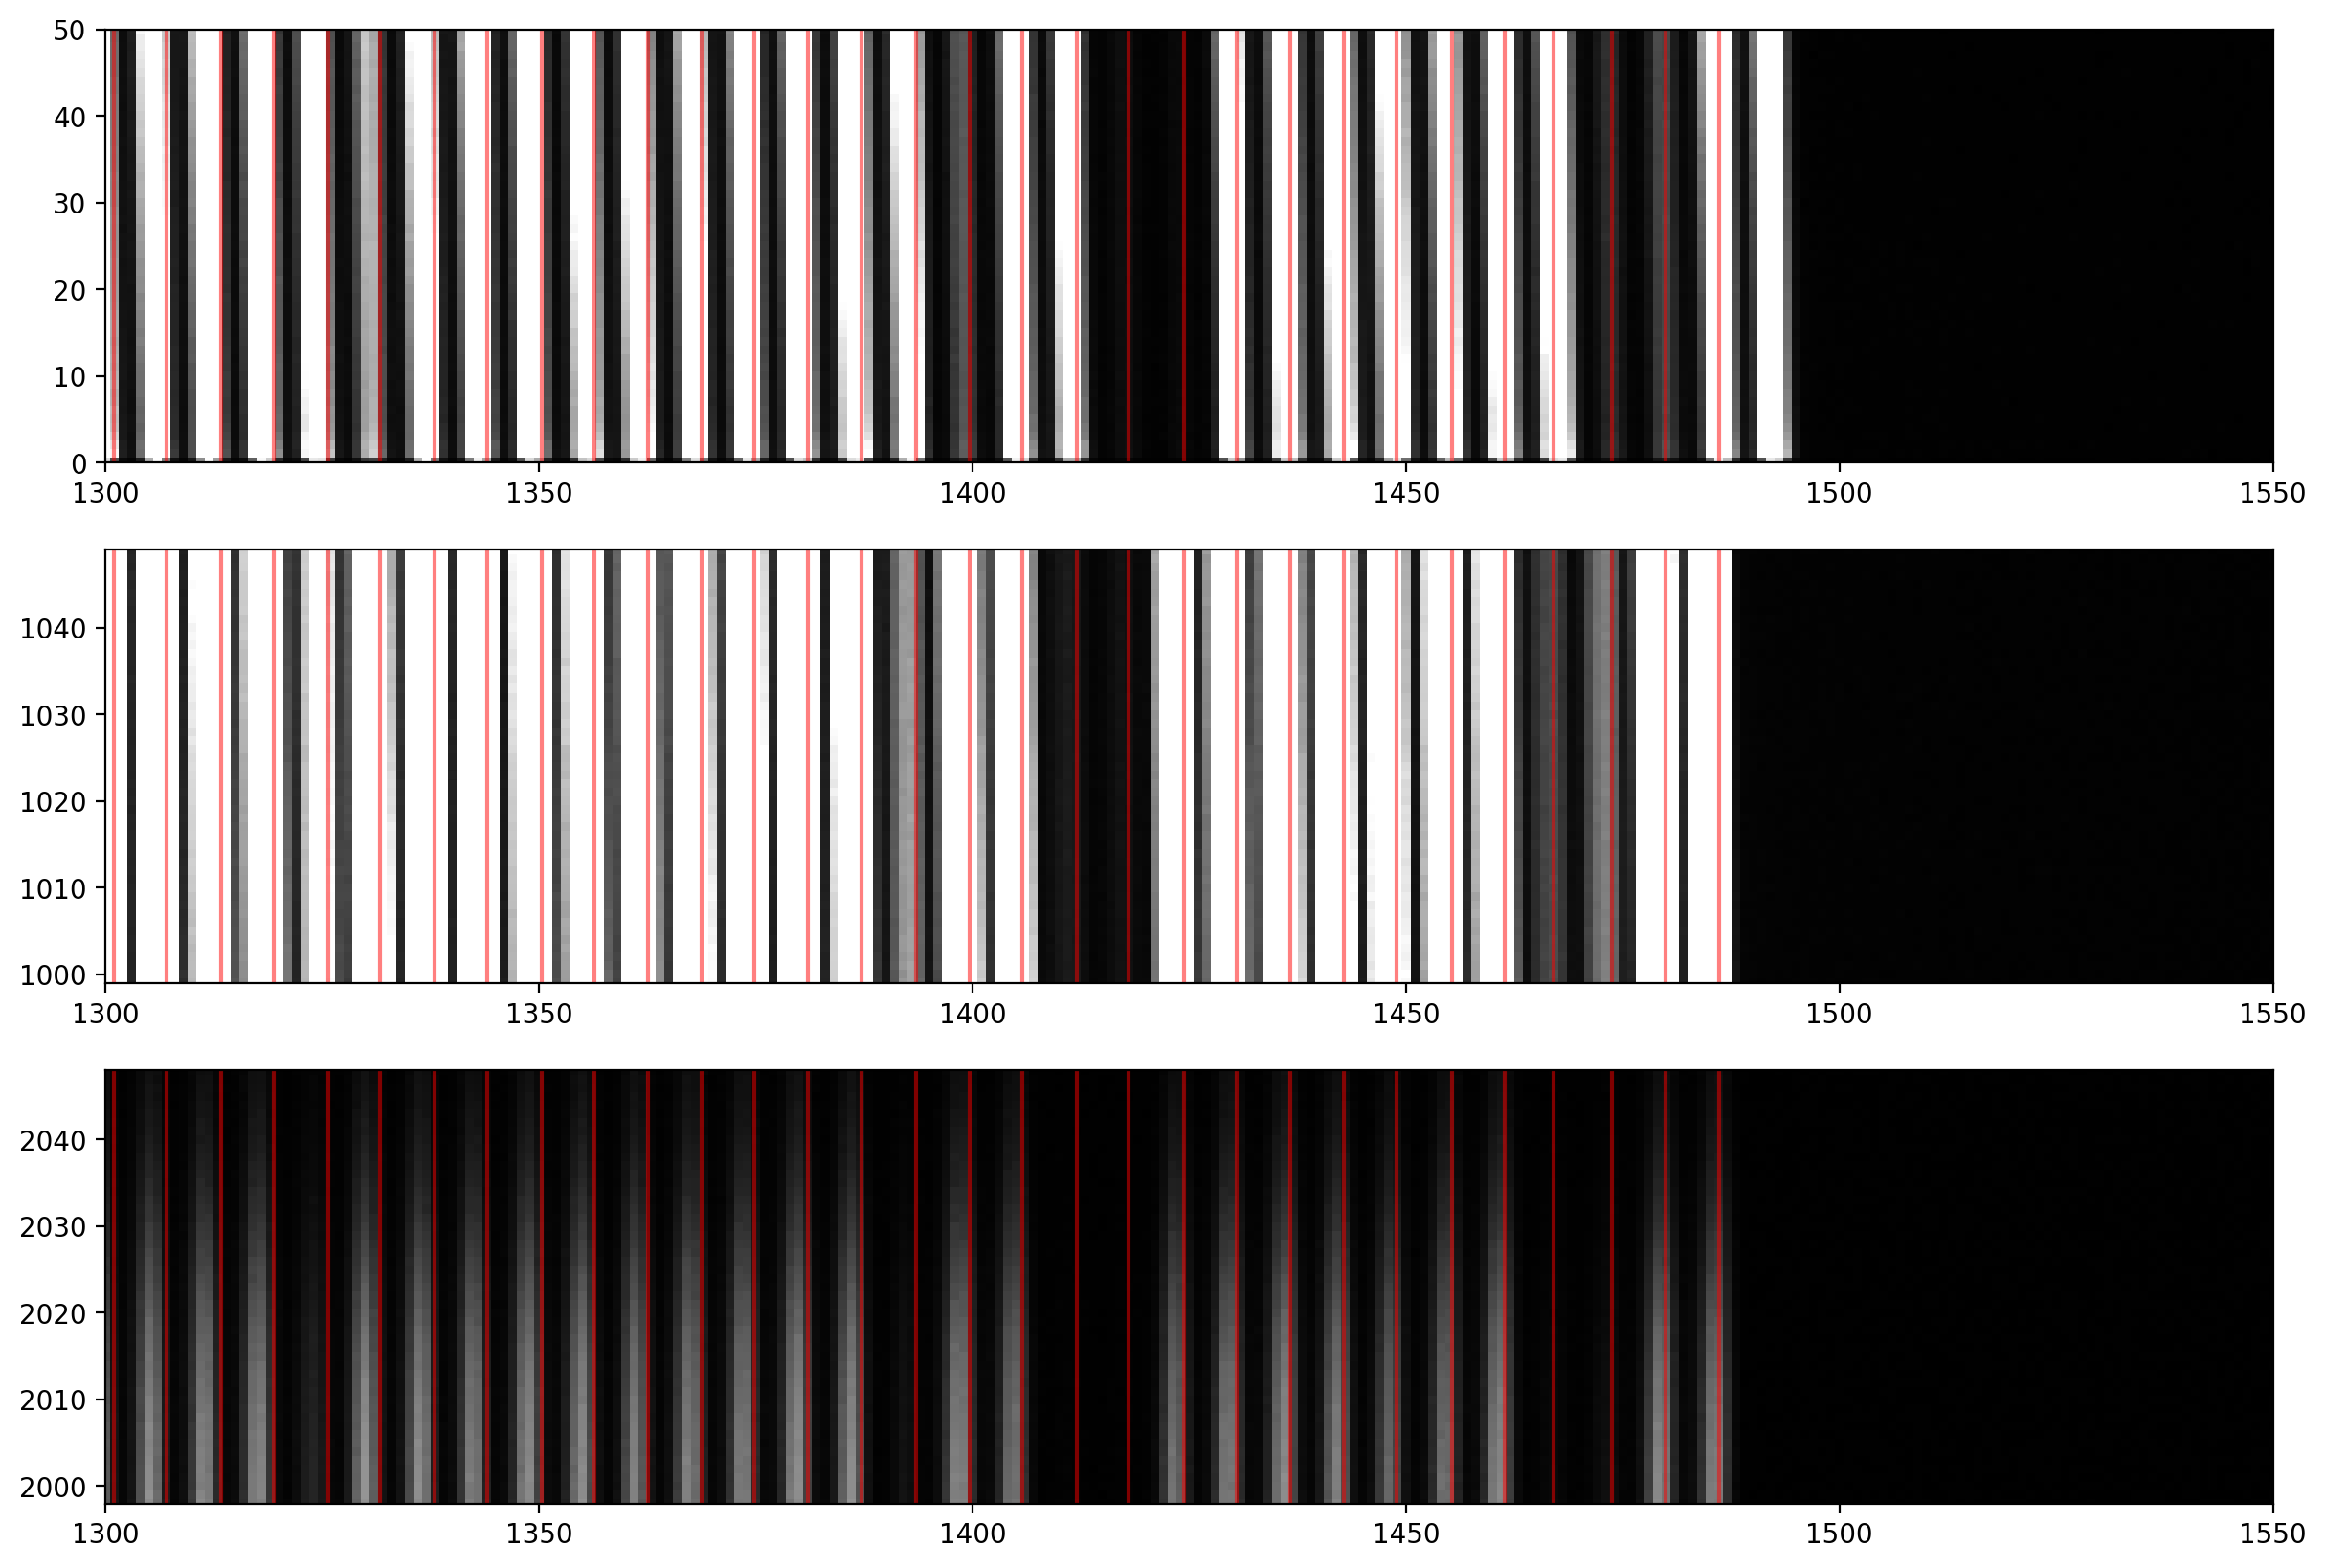

In [12]:
from astropy.visualization import ZScaleInterval
interval = ZScaleInterval()
vmin, vmax = interval.get_limits(hdu[0].data)
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
ax.imshow(hdu[0].data, cmap='gray', origin='lower')
ax.vlines(nomfpos_red, 0, 2048, color='r', alpha=0.5)
ax.set_xlim(500, 1550)
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(311)
ax.imshow(hdu[0].data, cmap='gray', origin='lower', vmin=vmin, vmax=vmax)
ax.vlines(nomfpos_red, 0, 2048, color='r', alpha=0.5)
ax.set_xlim(700, 950)
ax.set_xlim(1300, 1550)
ax.set_ylim(0, 50)
# fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(312)
ax.imshow(hdu[0].data, cmap='gray', origin='lower', vmin=vmin, vmax=vmax)
ax.vlines(nomfpos_red, 0, 2048, color='r', alpha=0.5)
ax.set_xlim(700, 950)
ax.set_xlim(1300, 1550)
ax.set_ylim(1024-25, 1024+25)
# fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(313)
ax.imshow(hdu[0].data, cmap='gray', origin='lower', vmin=vmin, vmax=vmax)
ax.vlines(nomfpos_red, 0, 2048, color='r', alpha=0.5)
ax.set_xlim(700, 950)
ax.set_xlim(1300, 1550)
ax.set_ylim(2048-50, 2048)

In [13]:
np.arctan(6.2/2048)*180/np.pi

0.17345349012216546

In [144]:
NFIBERS = 150
fiberstep = 6.7
fiberpos_start = 500

xnfib = np.arange(NFIBERS)
np.random.seed(99)
fiberpos = fiberpos_start + fiberstep*xnfib + np.random.normal(0, 0.1, NFIBERS)

dispersion_shifts = np.random.normal(0, 3, NFIBERS) + (xnfib-NFIBERS/2)**2*100/NFIBERS**2*4
fiber_throughputs = np.random.uniform(0.7, 1.0, NFIBERS)

fiber_types = fibermap['TYPE'].data[:NFIBERS]
fiber_throughputs[fiber_types == 'N'] = 0.0

# broadcast fiberpos
fiberpos = fiberpos[:, None]
fiber_throughputs = fiber_throughputs[:, None]
dispersion_shifts = dispersion_shifts[:, None]
ytram_fiducial = np.arange(2048)
xtram_fiducial = fiberpos + ytram_fiducial*np.tan(0.5*np.pi/180) + 2*np.sin((ytram_fiducial-1024)*np.pi/2048)
ztram_fiducial = (-((ytram_fiducial-1400-dispersion_shifts)/20)**2 + 9000) + np.exp(-((ytram_fiducial-dispersion_shifts)/700)**2)*4000

In [145]:
fiber_types

array(['N', 'N', 'N', 'N', 'N', 'P', 'P', 'P', 'P', 'P', 'N', 'P', 'P',
       'P', 'N', 'P', 'P', 'P', 'N', 'N', 'P', 'P', 'P', 'N', 'N', 'P',
       'P', 'P', 'N', 'P', 'P', 'P', 'N', 'N', 'P', 'P', 'P', 'P', 'P',
       'N', 'P', 'P', 'P', 'N', 'P', 'N', 'P', 'P', 'P', 'P', 'P', 'N',
       'P', 'P', 'P', 'N', 'N', 'N', 'P', 'N', 'N', 'P', 'N', 'N', 'N',
       'N', 'P', 'P', 'P', 'N', 'N', 'P', 'P', 'N', 'N', 'N', 'P', 'P',
       'P', 'P', 'N', 'N', 'P', 'P', 'N', 'N', 'N', 'P', 'N', 'P', 'P',
       'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'N', 'P', 'P', 'P',
       'N', 'N', 'N', 'N', 'P', 'P', 'P', 'N', 'P', 'N', 'P', 'P', 'N',
       'N', 'P', 'N', 'P', 'N', 'P', 'N', 'P', 'P', 'P', 'N', 'P', 'P',
       'P', 'P', 'P', 'N', 'N', 'P', 'P', 'N', 'N', 'P', 'P', 'P', 'P',
       'P', 'N', 'N', 'N', 'N', 'P', 'P'], dtype='<U1')

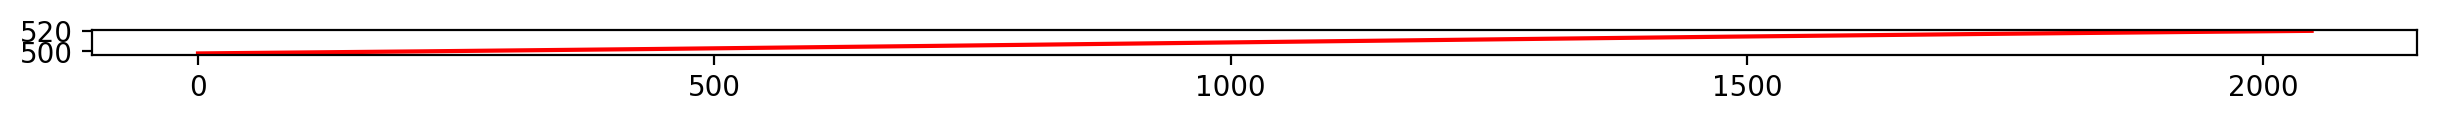

In [146]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
ax.plot(ytram_fiducial, xtram_fiducial[0], 'r-')
# ax.plot(xtram_fiducial[0], ytram_fiducial, 'r-')
ax.set_aspect('equal')

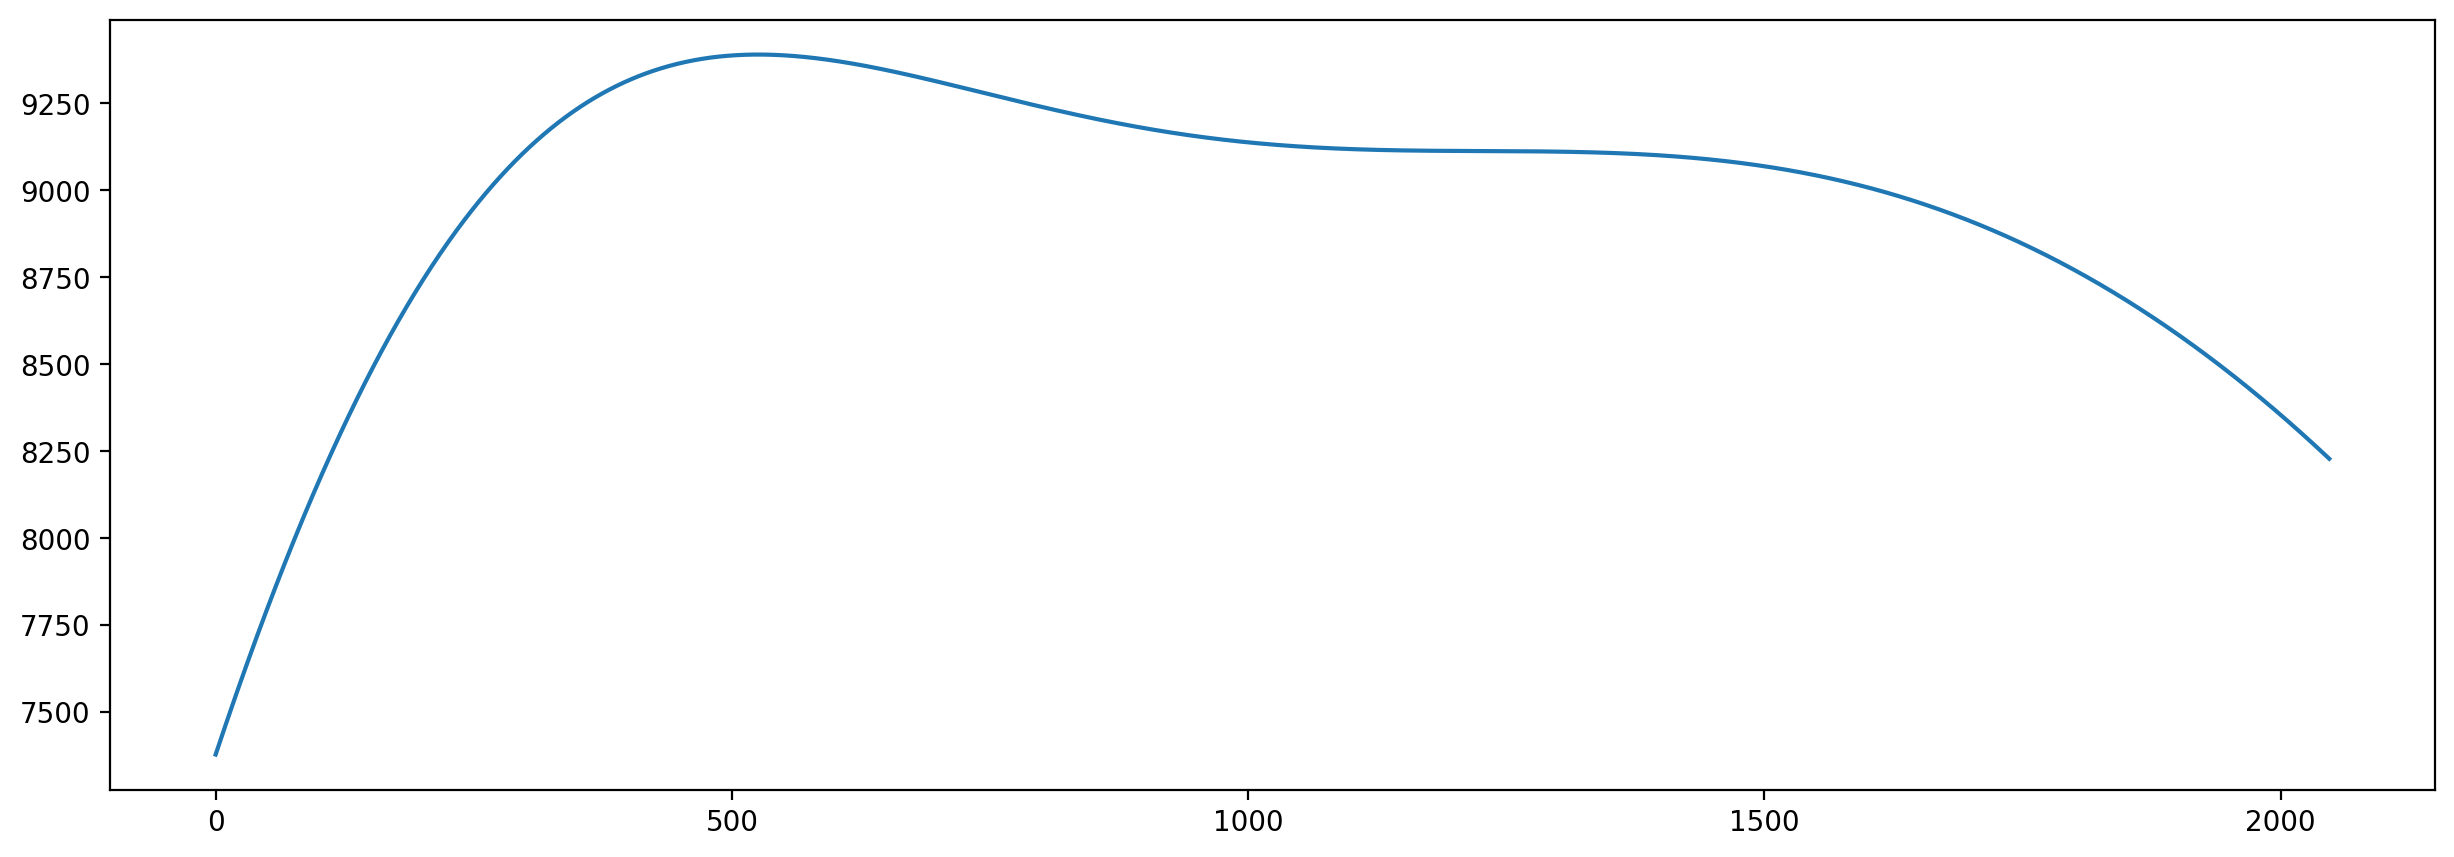

In [147]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
# for i in range(15):
ax.plot(ytram_fiducial, ztram_fiducial[0])

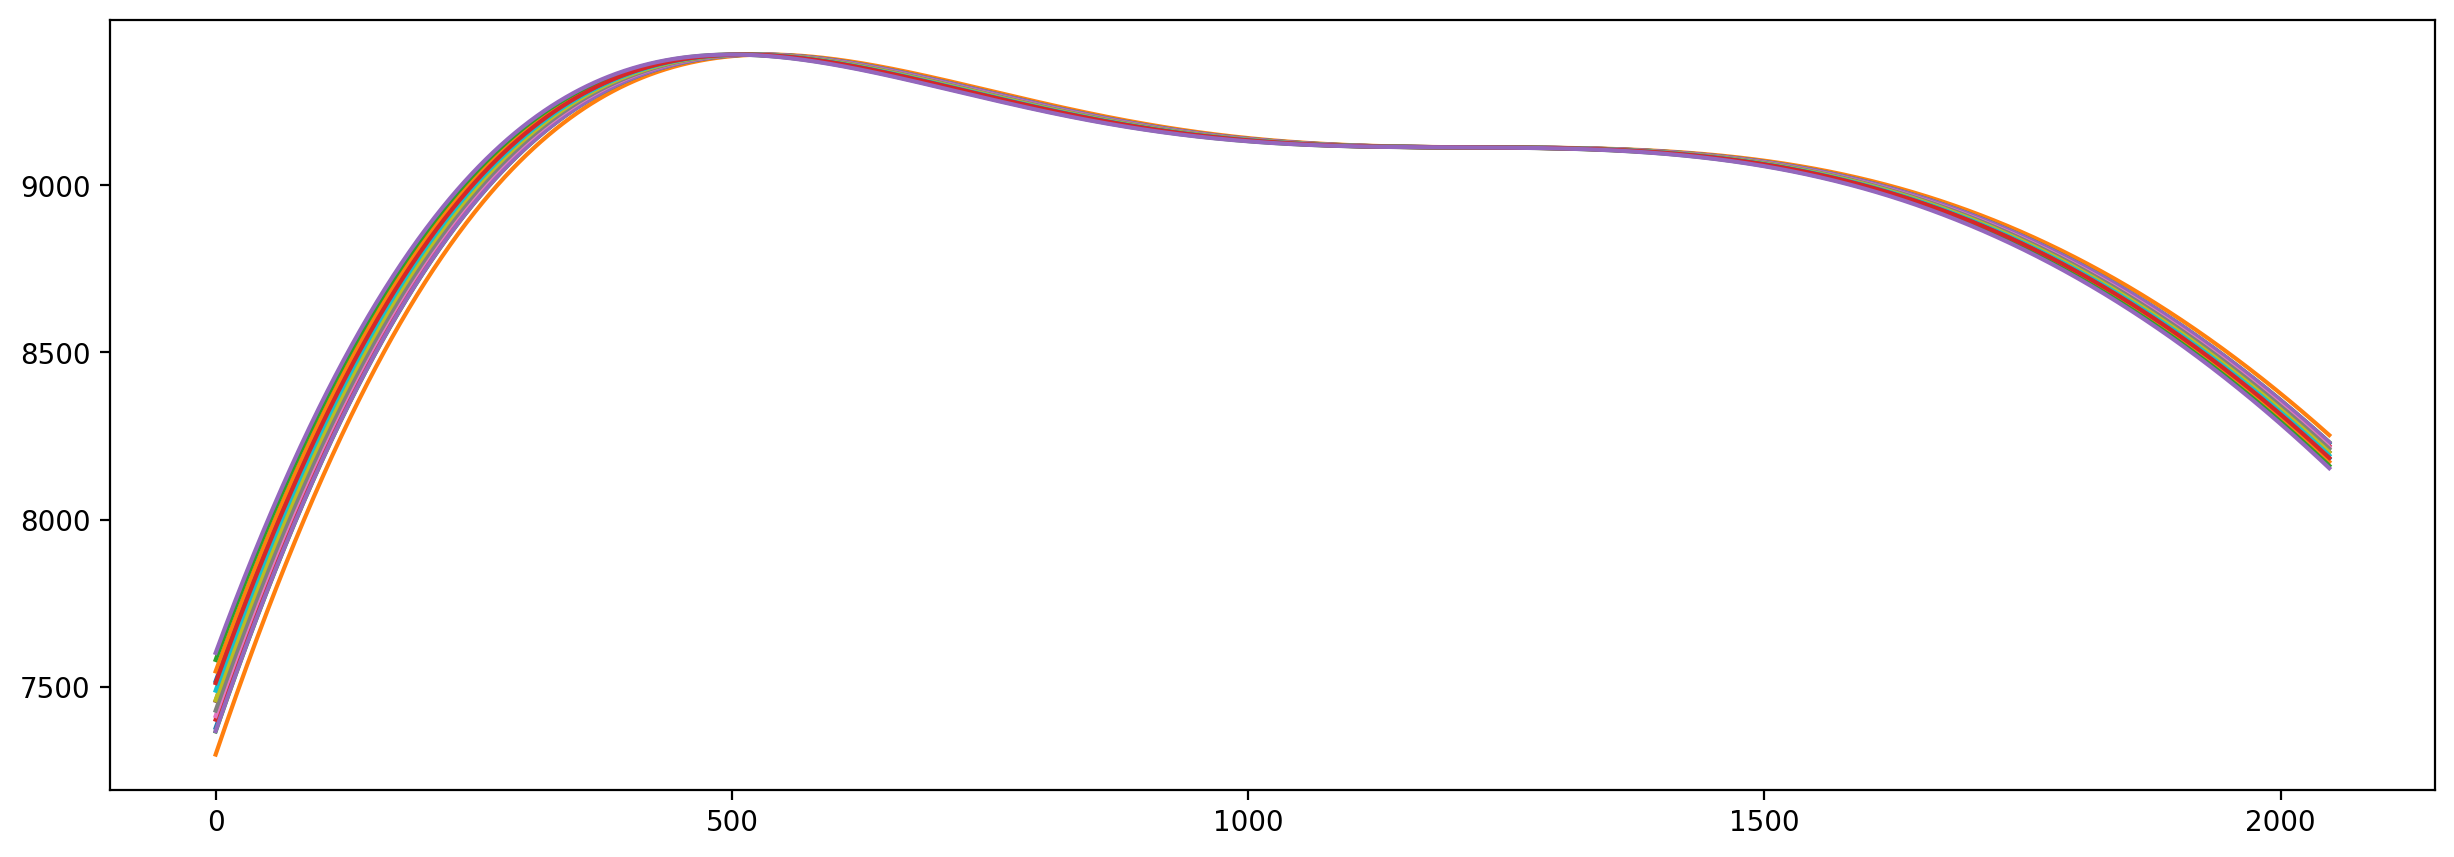

In [148]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
for i in range(15):
    ax.plot(ytram_fiducial, ztram_fiducial[i])

In [149]:
nmul = 10
nimg = 2048 * nmul
img = np.zeros((nimg, nimg))
xangle = 0.5*np.pi/180
ymeanx = nimg/2
ymulx = 20
ymeanz = 14000
ymulz1, ymulz2 = 200, 7000
ytram_fiducial = np.arange(nimg)
xtram_fiducial = fiberpos*nmul + ytram_fiducial*np.tan(xangle) + ymulx*np.sin((ytram_fiducial-ymeanx)*np.pi/nimg)
ztram_fiducial = (-((ytram_fiducial-ymeanz-dispersion_shifts)/ymulz1)**2 + 9000) + np.exp(-((ytram_fiducial-dispersion_shifts)/ymulz2)**2)*4000

xtram_indices = xtram_fiducial.astype(int)  # Ensure indices are integer for array indexing
fiber_mult_ztram = fiber_throughputs * ztram_fiducial  # Element-wise multiplication

# Use advanced indexing to add the calculated values directly to img
np.add.at(img, (np.arange(nimg)[np.newaxis,:], xtram_indices), fiber_mult_ztram)

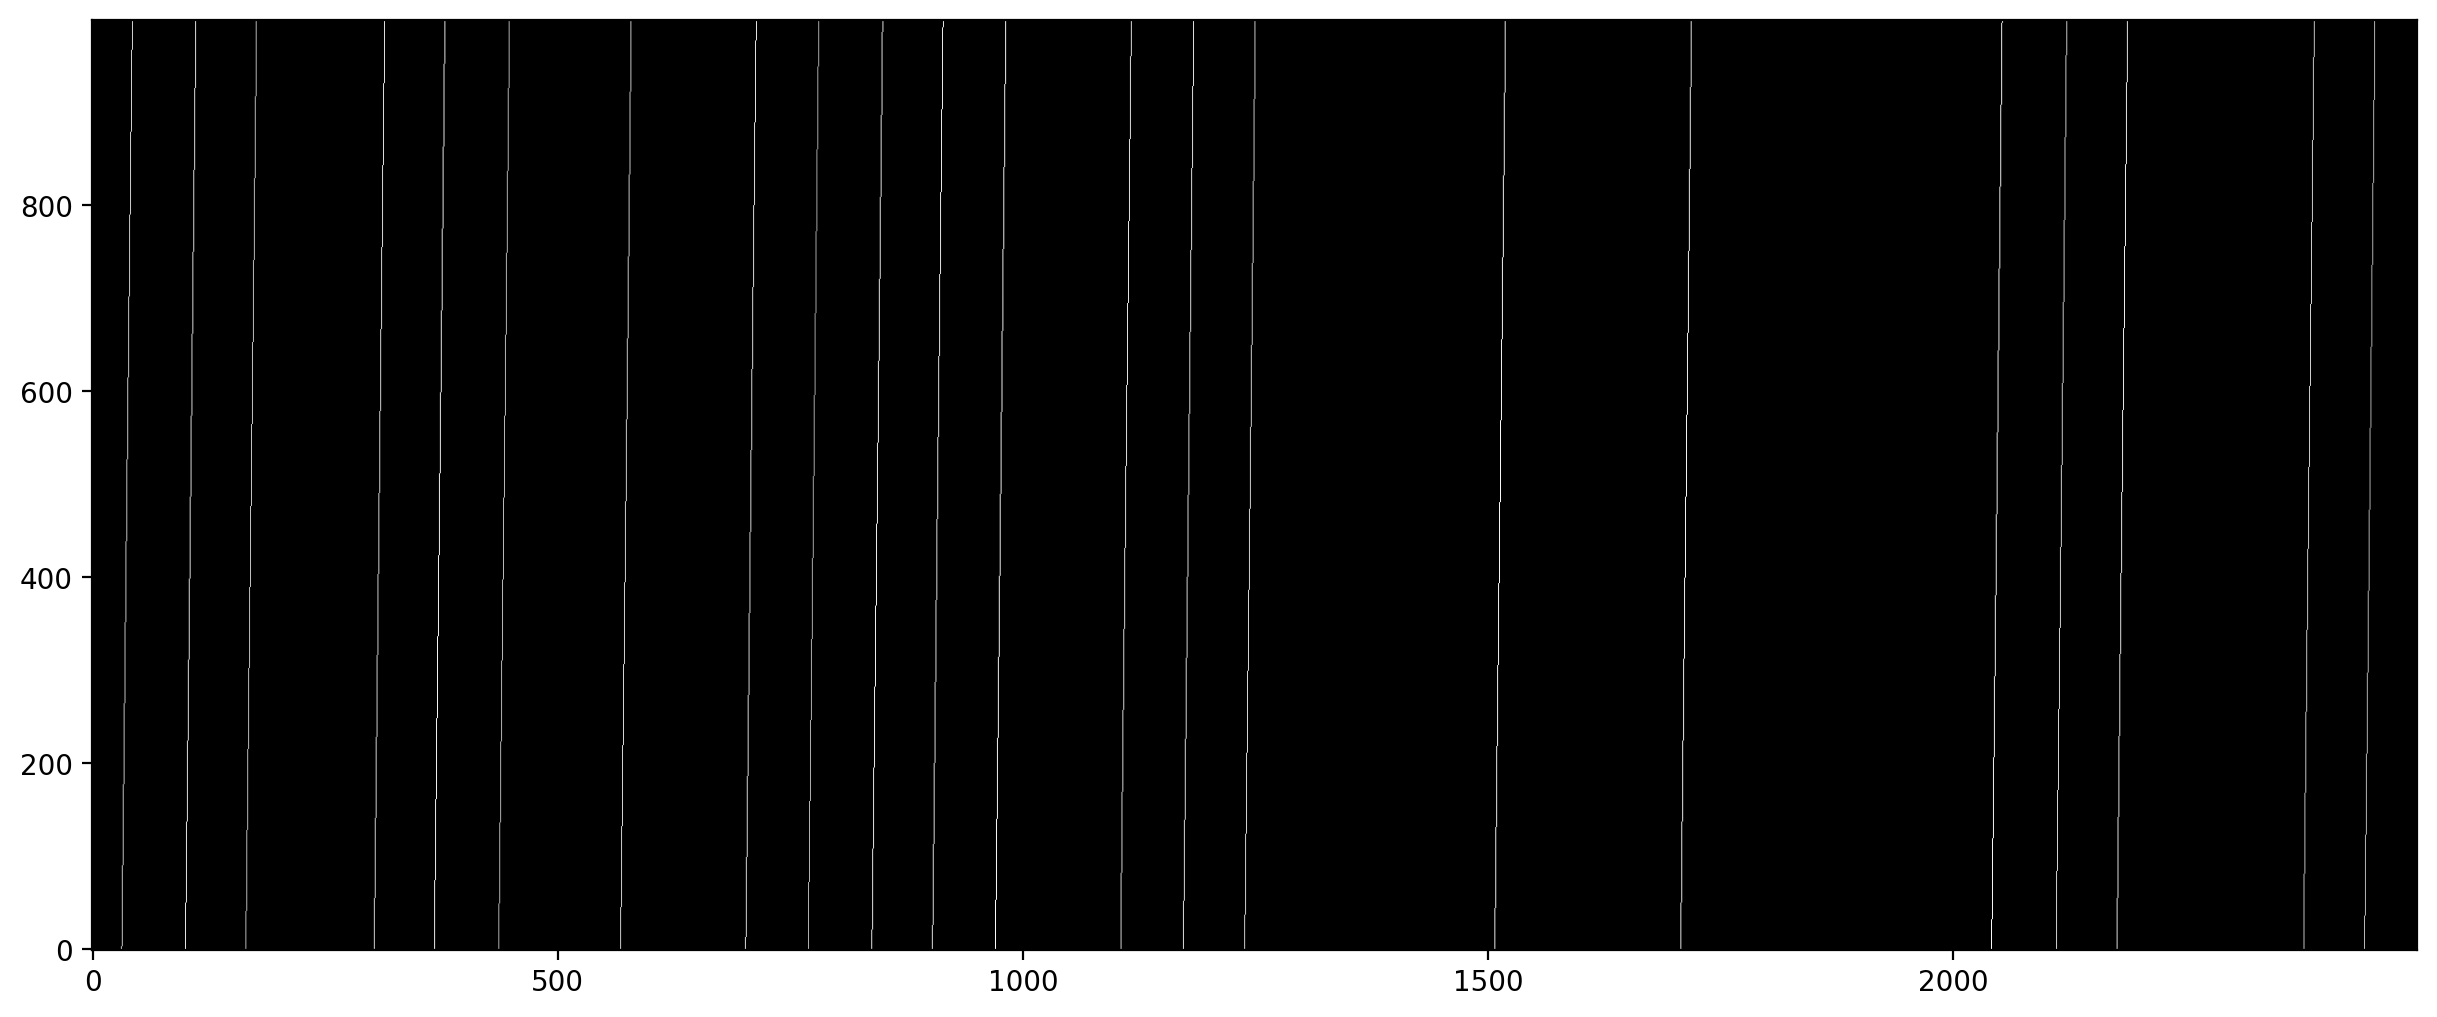

In [150]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
ax.imshow(img[13000:14000,7500:10000], cmap='gray', origin='lower')

In [151]:
from scipy.ndimage import gaussian_filter
img_smooth = gaussian_filter(img, fiberstep/2*nmul/(2*np.sqrt(2*np.log(2))))

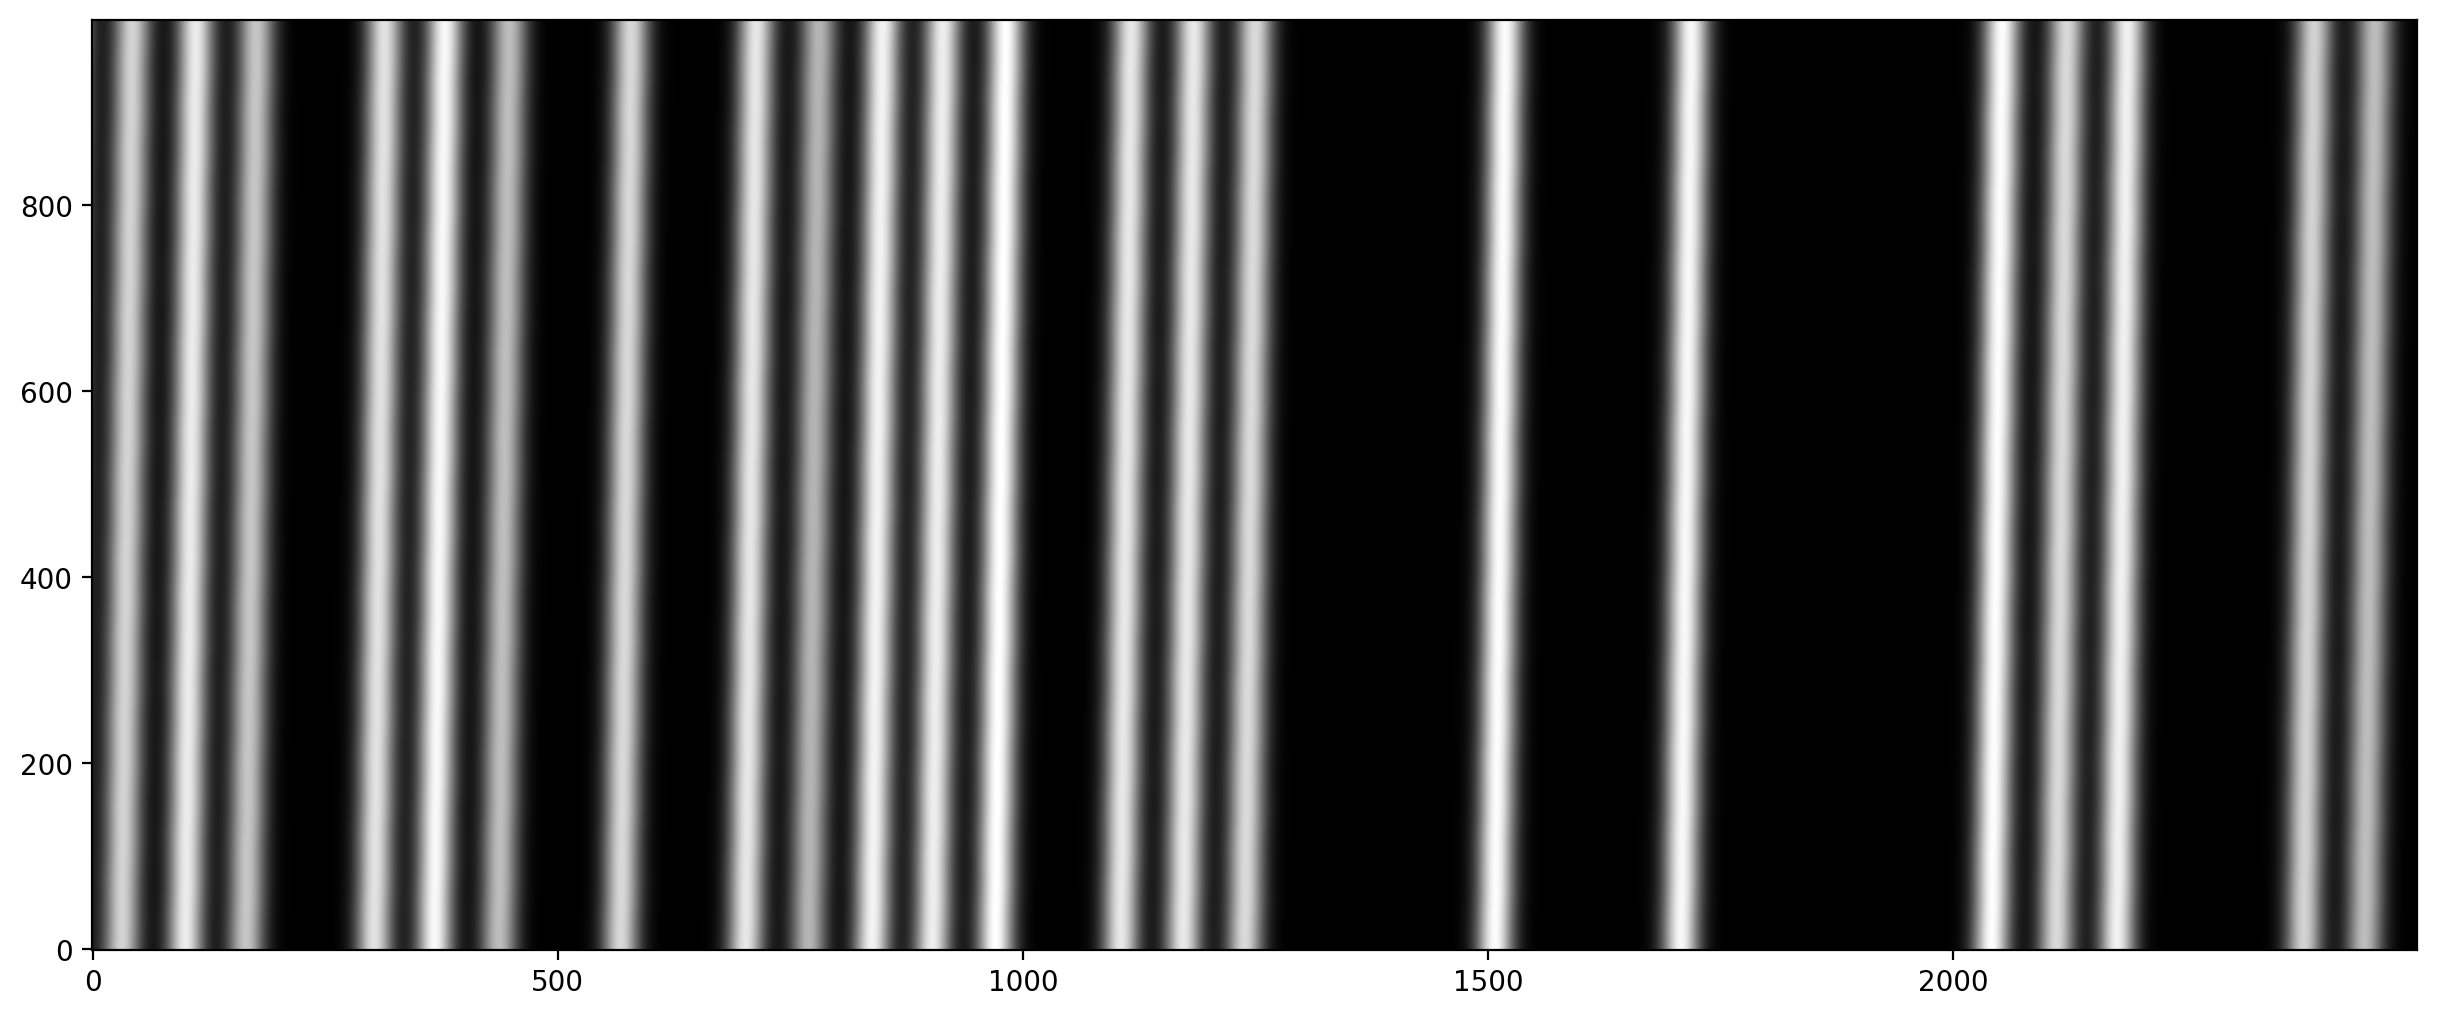

In [152]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
ax.imshow(img_smooth[13000:14000,7500:10000], cmap='gray', origin='lower')

In [153]:
from skimage.measure import block_reduce
img_downsample = block_reduce(img_smooth, (nmul, nmul), np.sum)/2

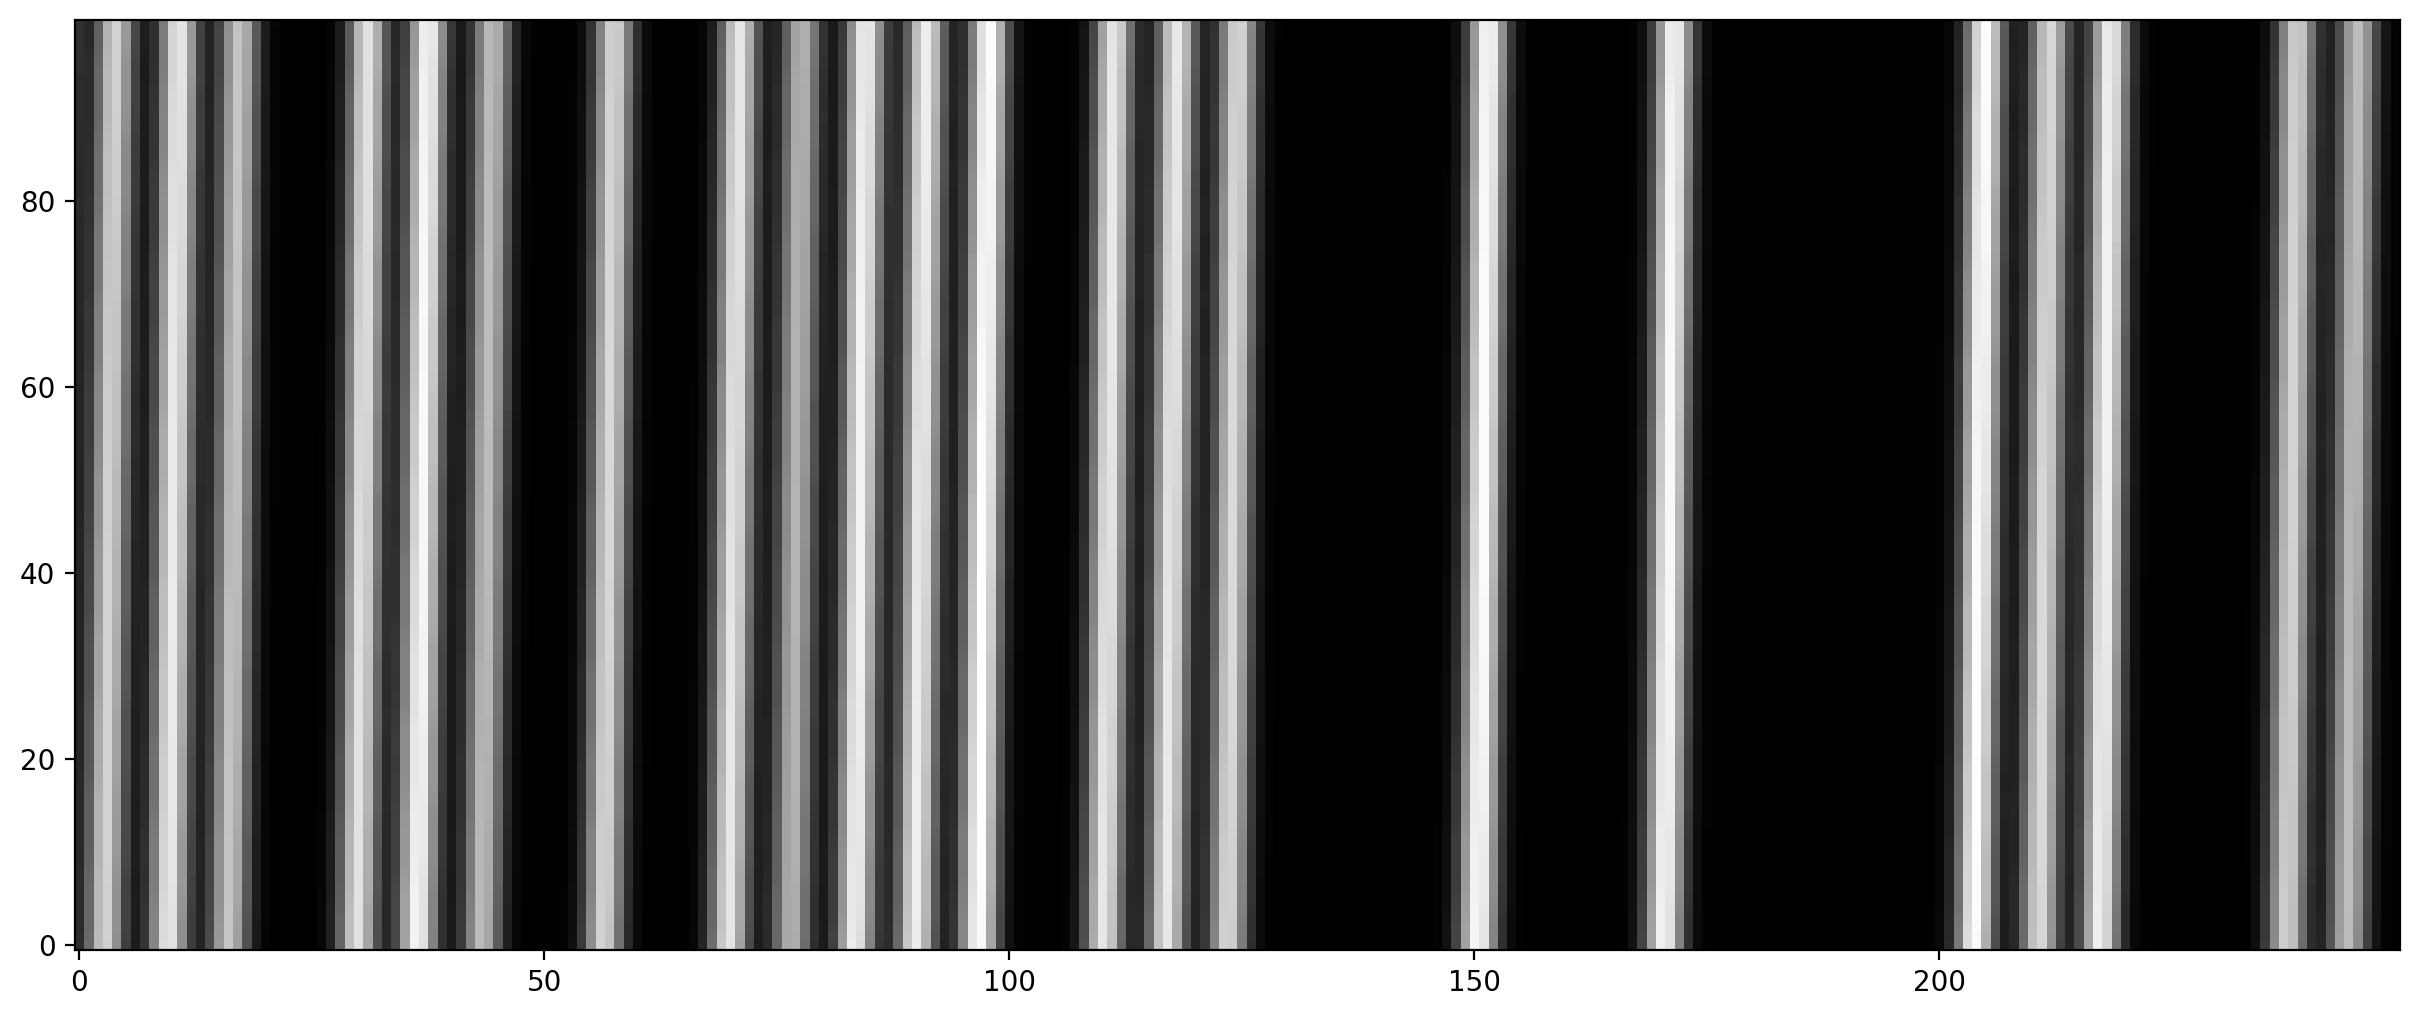

In [154]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
ax.imshow(img_downsample[1300:1400,750:1000], cmap='gray', origin='lower')

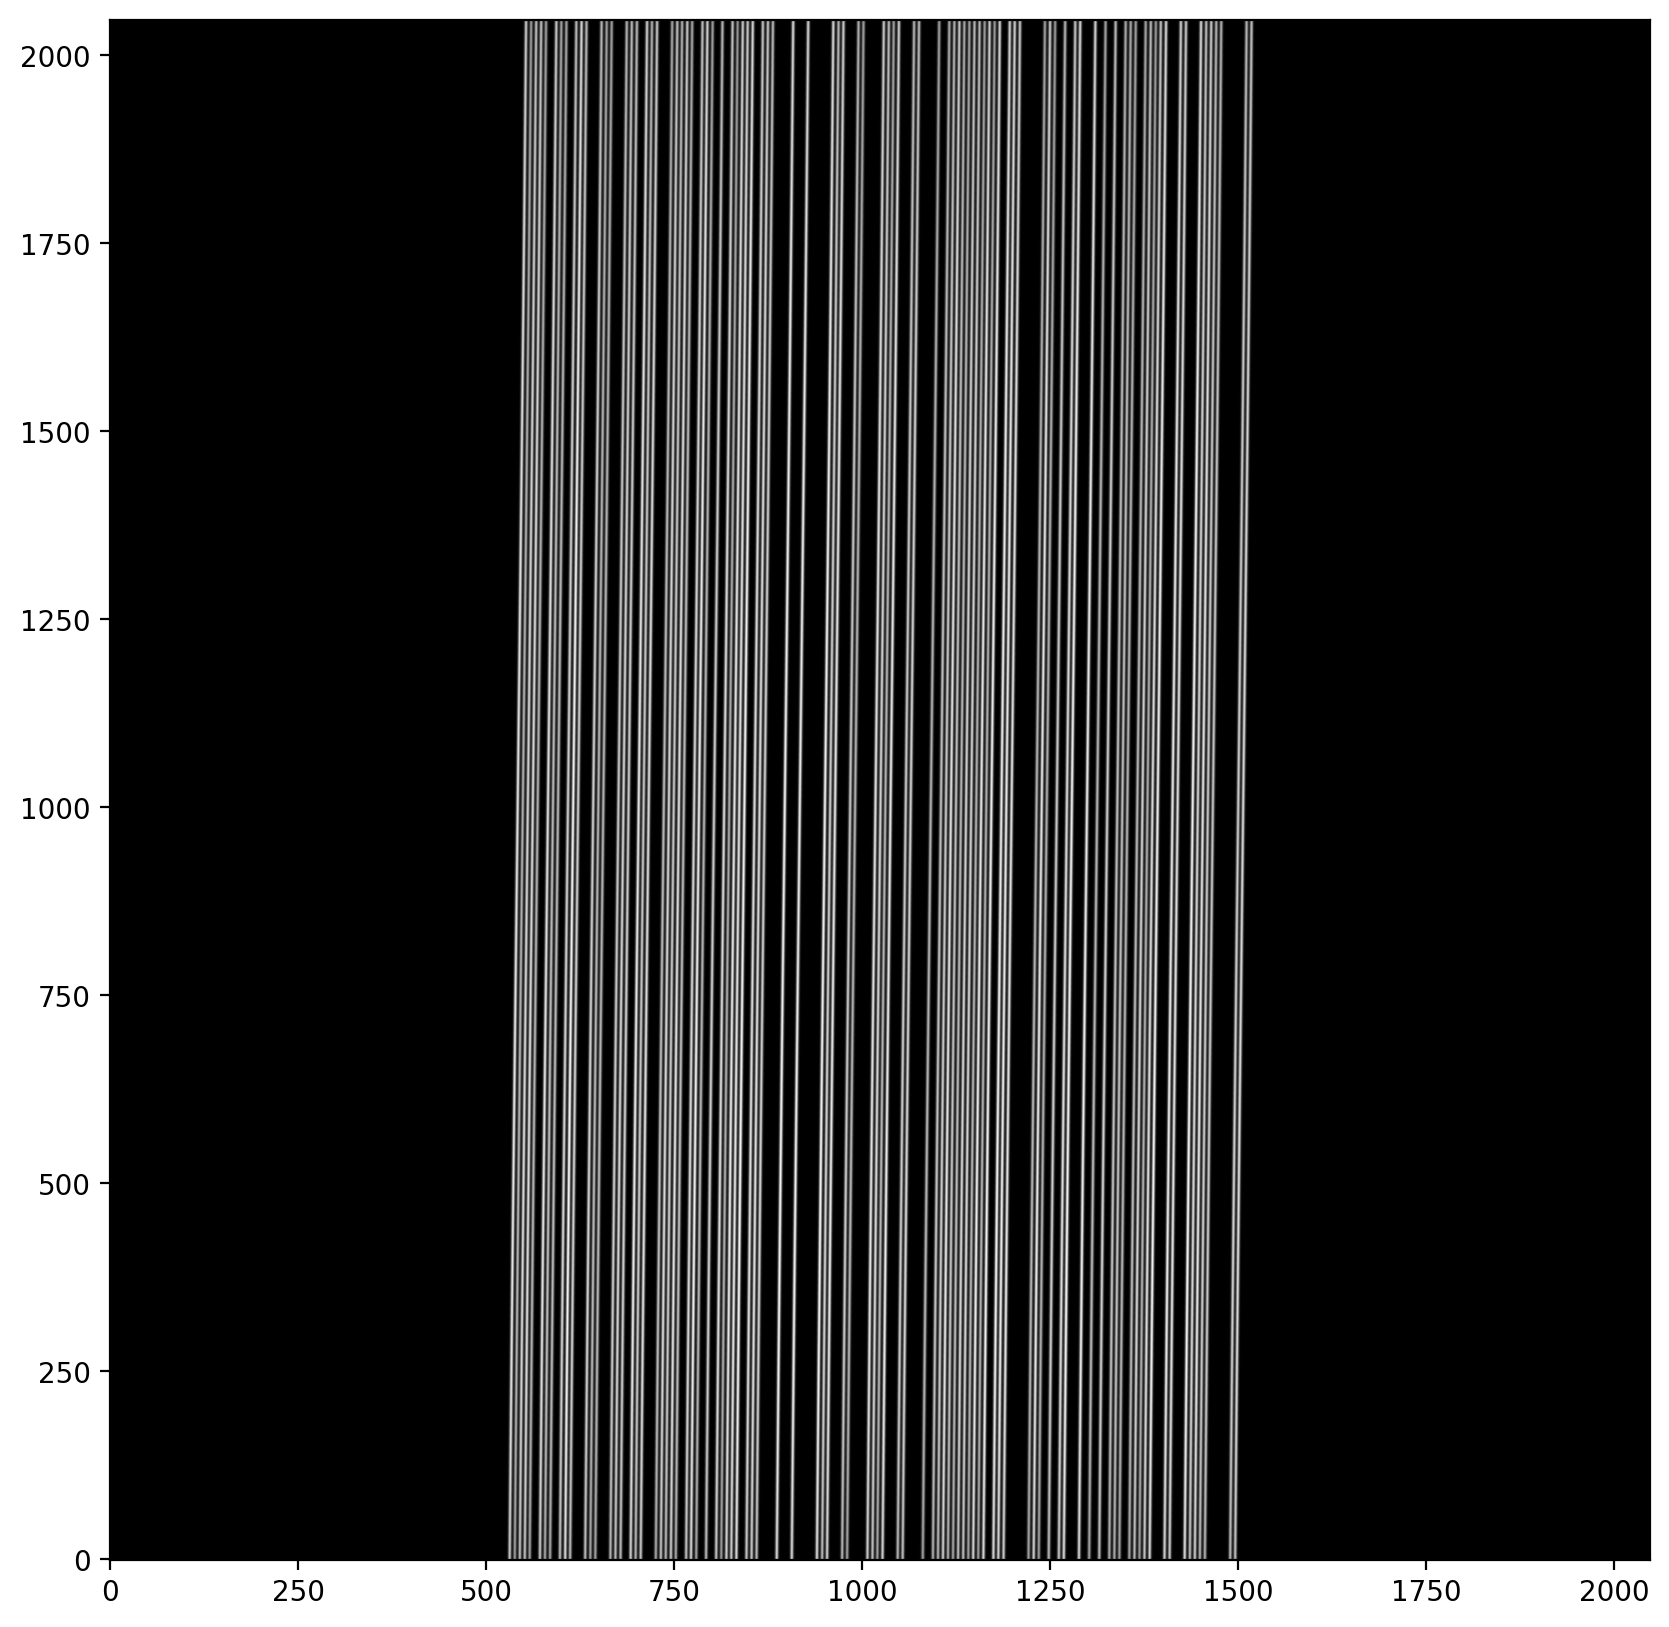

In [155]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
ax.imshow(img_downsample, cmap='gray', origin='lower')

In [156]:
rdnoise = hdu[0].header['RO_NOISE']
gain = hdu[0].header['RO_GAIN']
print(rdnoise, gain)

img_rdnoise = np.random.normal(0, rdnoise/gain, img_downsample.shape)
bias_level = 0 # 500

shotnoise = np.sqrt(img_downsample)
img_shotnoise = np.random.normal(0, shotnoise, img_downsample.shape)

mock_ccd = img_downsample + bias_level + img_rdnoise + img_shotnoise
mock_ccd = mock_ccd.astype(np.int16)

6.87 1.87


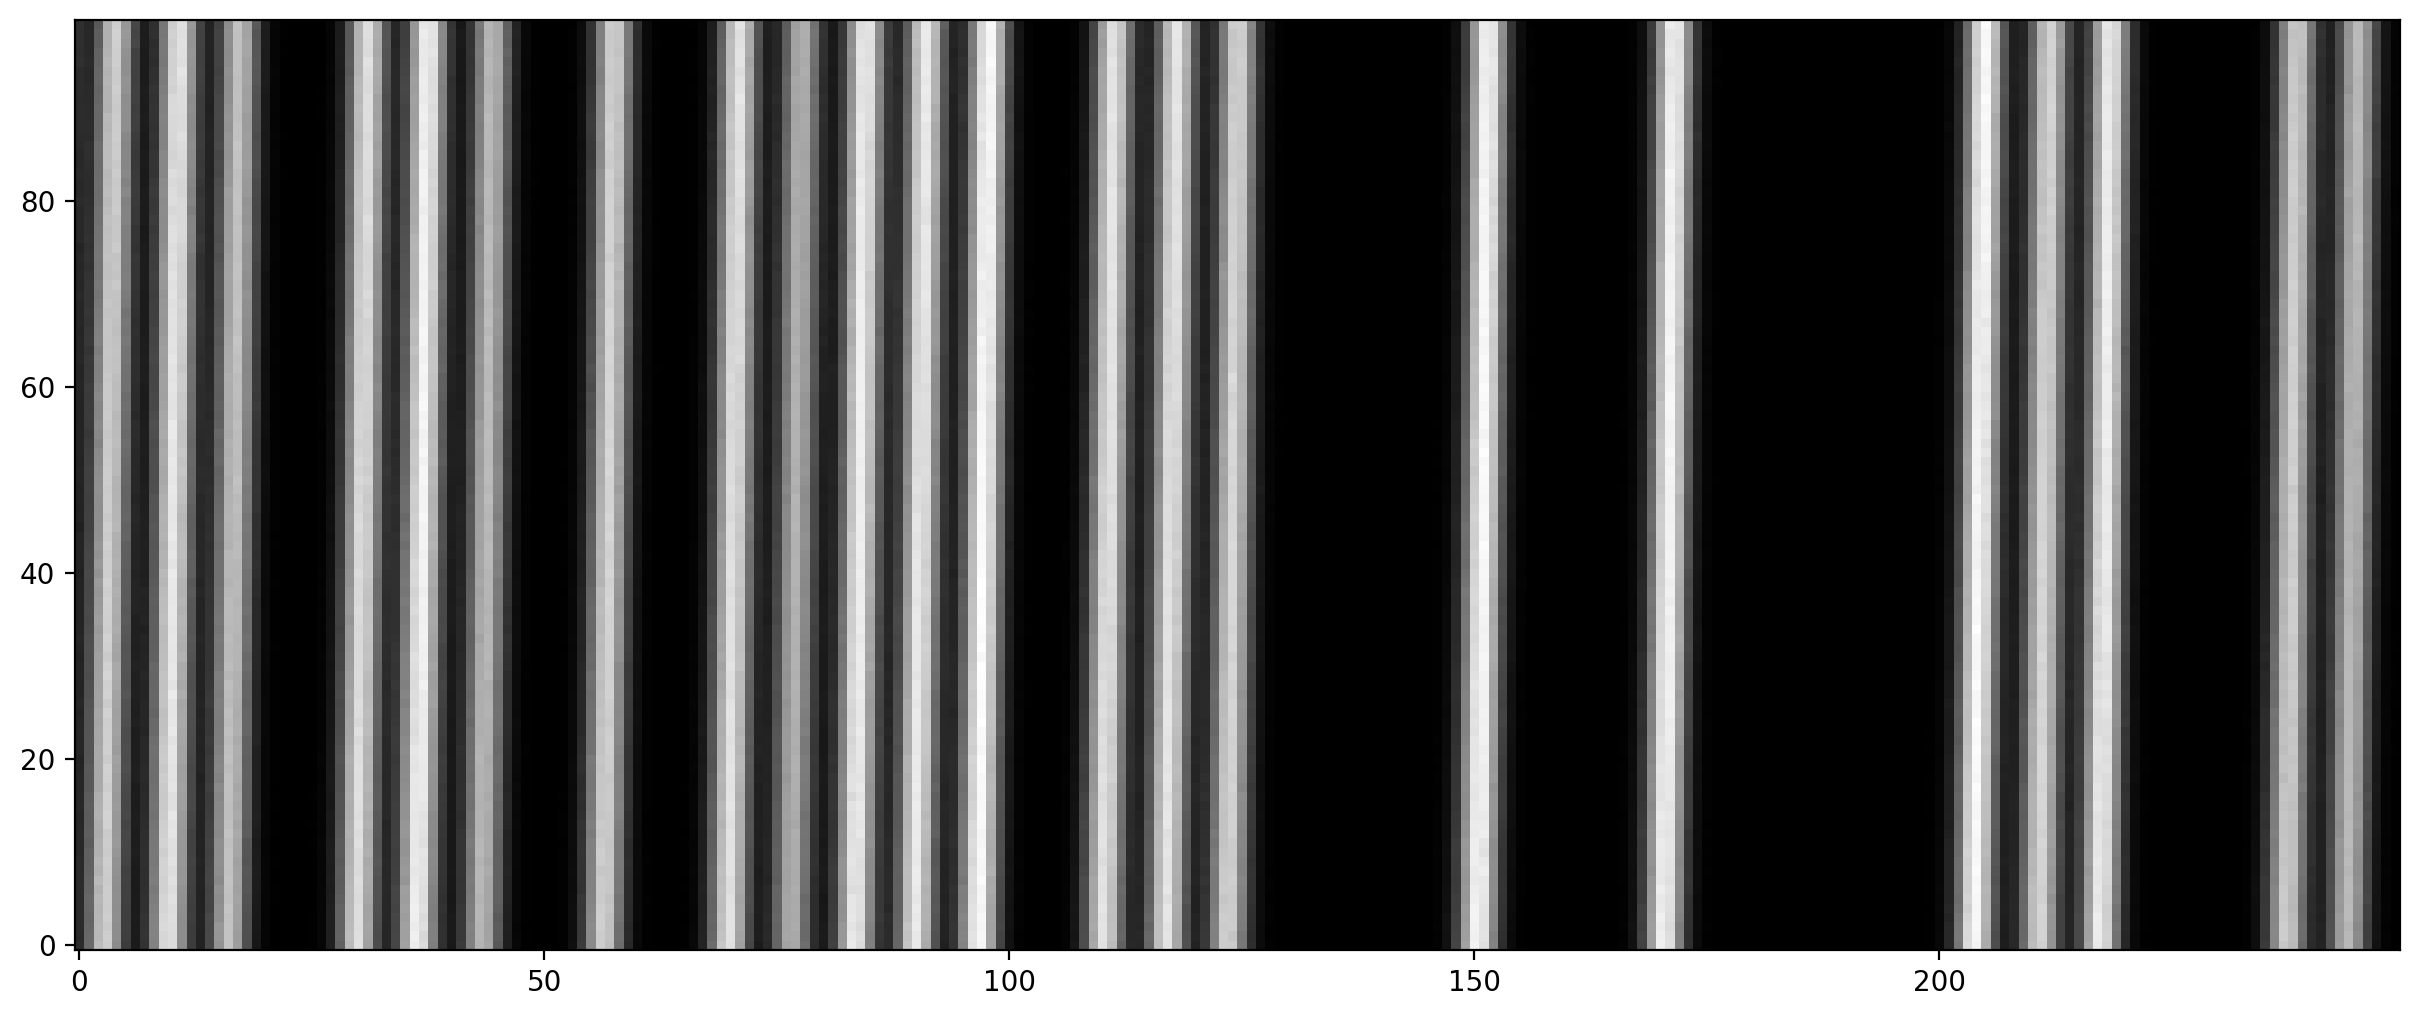

In [157]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
ax.imshow(mock_ccd[1300:1400,750:1000], cmap='gray', origin='lower')

In [158]:
# hdr = hdu[0].header.copy()
# # hdu[0].data = mock_ccd
# # hdr = hdu[0].header
# hdr['NAXIS1'] = mock_ccd.shape[1]
# hdr['NAXIS2'] = mock_ccd.shape[0]
# hdr['TELESCOP'] = 'MOCK'
# hdr['INSTRUME'] = 'GENERIC-STD'
# thdr = hdu[1].header.copy()
# # hdu[1].data = hdu[1].data[:NFIBERS]
# # thdr = hdu[1].header
# thdr['NAXIS2'] = NFIBERS
# ihdu = fits.PrimaryHDU(mock_ccd.byteswap().newbyteorder('>i'), header=hdr)
# thdu = fits.BinTableHDU(hdu[1].data[:NFIBERS].byteswap().newbyteorder('>i'), header=thdr)
# hdul = fits.HDUList([ihdu, thdu])
# hdul.writeto(OUTDIR/'mock0001.fits', overwrite=True)
# # hdu.writeto('mock0001.fits', overwrite=True)

In [ ]:
outfits_path = OUTDIR/'mock0001.fits'
if outfits_path.exists():
    outfits_path.unlink()
    
import fitsio
from fitsio import FITS, FITSHDR
hdr = fitsio.read_header(input_file, ext=0)
hdr['NAXIS1'] = mock_ccd.shape[1]
hdr['NAXIS2'] = mock_ccd.shape[0]
hdr['TELESCOP'] = 'MOCK'
hdr['INSTRUME'] = 'GENERIC-STD'
hdr['BZERO'] = 0
thdr = fitsio.read_header(input_file, ext=0)
# hdu[1].data = hdu[1].data[:NFIBERS]
# thdr = hdu[1].header
thdr['NAXIS2'] = NFIBERS
thdr['INSTRUME'] = 'GENERIC-STD'

fits_mock = FITS(outfits_path, 'rw')
fits_mock.write(mock_ccd.T, header=hdr, extname='PRIMARY')
fits_mock.write(hdu[1].data[:NFIBERS], header=thdr, extname='STRUCT.MORE.FIBRES')
fits_mock.close()

In [45]:
hdu_mock = fits.open(OUTDIR/'mock0001.fits')
hdu_mock.info()

Filename: /Users/hbahk/Research/kspec/kspecdr/out/mock0001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     101   (2048, 2048)   int16   
  1  STRUCT.MORE.FIBRES    1 BinTableHDU    145   150R x 23C   [80A, D, D, D, D, D, D, J, J, D, I, I, 1A, J, J, I, I, I, D, 80A, D, D, 20A]   


In [46]:
mock_fiberpos = fiberpos[:,0] + np.random.normal(0, 0.1, NFIBERS)
for i, fpos in enumerate(mock_fiberpos):
    print(f'   NOMFPOS(  {i+1:3d}  )  =   {fpos:4.6f}')

   NOMFPOS(    1  )  =   499.884912
   NOMFPOS(    2  )  =   506.734707
   NOMFPOS(    3  )  =   513.582774
   NOMFPOS(    4  )  =   520.213630
   NOMFPOS(    5  )  =   526.666929
   NOMFPOS(    6  )  =   533.436721
   NOMFPOS(    7  )  =   540.235889
   NOMFPOS(    8  )  =   547.091455
   NOMFPOS(    9  )  =   553.665518
   NOMFPOS(   10  )  =   560.077421
   NOMFPOS(   11  )  =   567.113547
   NOMFPOS(   12  )  =   573.534581
   NOMFPOS(   13  )  =   580.296972
   NOMFPOS(   14  )  =   587.126279
   NOMFPOS(   15  )  =   594.002797
   NOMFPOS(   16  )  =   600.339993
   NOMFPOS(   17  )  =   607.326640
   NOMFPOS(   18  )  =   613.881851
   NOMFPOS(   19  )  =   620.390423
   NOMFPOS(   20  )  =   627.288085
   NOMFPOS(   21  )  =   633.912193
   NOMFPOS(   22  )  =   640.682406
   NOMFPOS(   23  )  =   647.155728
   NOMFPOS(   24  )  =   654.198083
   NOMFPOS(   25  )  =   660.851037
   NOMFPOS(   26  )  =   667.535820
   NOMFPOS(   27  )  =   674.162796
   NOMFPOS(   28  )  =   680

In [47]:
import os
os.chdir(OUTDIR)
os.system('aaorun list')

RUN GROUP : mock (GENERIC-STD RED)
mock0001.fits MFFFF


0

In [50]:
os.system('rm *im.fits *tlm.fits')
os.system('aaorun make_tlm mock0001.fits -idxfile generic.idx -generic_nfibres 150 -generic_lambda1 500 -generic_lambda2 700 -generic_row1 533 -generic_row2 1507')

rm: *im.fits: No such file or directory
rm: *tlm.fits: No such file or directory



AAO Run Process AAO03786:

ABOUT TO SPAWN
ABOUT TO CREATE NEW TASK CMD03786 from AAO03786
OBEY CHANGE_WD TO .
ABOUT TO SPAWN -- SUCCESS
aaorun:Main about to call aaorunCmd:make_tlm mock0001.fits -idxfile generic.idx -generic_nfibres 150 -generic_lambda1 500 -generic_lambda2 700 -generic_row1 533 -generic_row2 1507 -taskname CMD03786 -complete {{aaorun:CloseSpawnedTask CMD03786 aaorun:Exit}} -error    {aaorun:mainError CMD03786}
Executing 2DFdr Command: make_tlm on file mock0001.fits

Searching -IDXFILE GENERIC.IDX -GENERIC_NFIBRES 150 -GENERIC_LAMBDA1 500 -GENERIC_LAMBDA2 700 -GENERIC_ROW1 533 -GENERIC_ROW2 1507 -TASKNAME CMD03786 -COMPLETE {{AAORUN:CLOSESPAWNEDTASK CMD03786 AAORUN:EXIT}} -ERROR {AAORUN:MAINERROR CMD03786}
Configuring for default generic.idx
additional_args=-idxfile generic.idx -generic_nfibres 150 -generic_lambda1 500 -generic_lambda2 700 -generic_row1 533 -generic_row2 1507 -taskname CMD03786 -complete {{aaorun:CloseSpawnedTask CMD03786 aaorun:Exit}} -error {aaorun:

0

In [33]:
hdu_mock[1].header['NFIBRES']

KeyError: "Keyword 'NFIBRES' not found."

In [ ]:
Table(hdu_mock[1].data)

NAME,RA,DEC,RA_DEG,DEC_DEG,RA_ACT,DEC_ACT,X,Y,ROTATION,XERR,YERR,TYPE,BUGID,BUGSRL,SUCCESS,PRIORITY,ASSIGNED,MAGNITUDE,COMMENT,PMRA_AS,PMDEC_AS,PROGRAM
str80,float64,float64,float64,float64,float64,float64,int32,int32,float64,int16,int16,str1,int32,int32,int16,int16,int16,float64,str80,float64,float64,str20
NO FIBRE IN THIS POSITION,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,N,0,0,0,0,0,0.0,,0.0,0.0,
NO FIBRE IN THIS POSITION,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,N,0,0,0,0,0,0.0,,0.0,0.0,
NO FIBRE IN THIS POSITION,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,N,0,0,0,0,0,0.0,,0.0,0.0,
NO FIBRE IN THIS POSITION,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,N,0,0,0,0,0,0.0,,0.0,0.0,
NO FIBRE IN THIS POSITION,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,N,0,0,0,0,0,0.0,,0.0,0.0,
AT NOMINAL HOME AFTER DEPLOY,0.0,0.0,0.0,0.0,0.0,0.0,-112600,-91800,0.0,0,0,P,18,264,0,0,0,0.0,,0.0,0.0,
AT NOMINAL HOME AFTER DEPLOY,0.0,0.0,0.0,0.0,0.0,0.0,-96200,-96200,0.0,0,0,P,19,113,0,0,0,0.0,,0.0,0.0,
AT NOMINAL HOME AFTER DEPLOY,0.0,0.0,0.0,0.0,0.0,0.0,-79700,-100600,0.0,0,0,P,20,418,0,0,0,0.0,,0.0,0.0,
AT NOMINAL HOME AFTER DEPLOY,0.0,0.0,0.0,0.0,0.0,0.0,-63300,-105000,0.0,0,0,P,21,224,0,0,0,0.0,,0.0,0.0,


In [ ]:
hdu_tlm = fits.open(OUTDIR/'mock0001tlm.fits')
hdu_tlm[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 2048 / length of data axis 1                          
NAXIS2  =                  150 / length of data axis                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
MWIDTH  = 4.840608192740148E+30 / Median spatial FWHM                           
UTDATE  = '2021:02:08'         / UT Date                                        
UTSTART = '09:36:42'           / UT Start                                       
2DFDRVER= '?       '           / Version of 2dfdr that created this file        

# Arc frame

In [40]:
hdu_arcred = fits.open(WD/'resources'/'08feb10091red.fits')
# Table(hdu_arcred[8].data).pprint_all()
hdu_arcred.info()

Filename: /Users/hbahk/Research/kspec/kspecdr/resources/08feb10091red.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     109   (2098, 150)   float32   
  1  VARIANCE      1 ImageHDU         8   (2098, 150)   float32   
  2  FIBRES        1 BinTableHDU     96   150R x 23C   [80A, 1D, 1D, 1D, 1D, 1D, 1D, 1J, 1J, 1D, 1I, 1I, 1A, 1J, 1J, 1I, 1I, 1I, 1D, 80A, 1D, 1D, 20A]   
  3  NDF_CLASS     1 BinTableHDU     11   1R x 1C   [10A]   
  4  WAVELA        1 ImageHDU         8   (2098, 150)   float32   
  5  WAVE_LHS      1 ImageHDU         8   (2098, 150)   float64   
  6  WAVE_RHS      1 ImageHDU         8   (2098, 150)   float64   
  7  SHIFTS        1 ImageHDU         8   (150, 10)   float64   
  8  REDUCTION_ARGS    1 TableHDU        15   123R x 2C   [A16, A32]   
  9  REDUCED       1 BinTableHDU     11   1R x 1C   [1L]   


In [69]:
fibermap_arcred = Table(hdu_arcred[2].data)
np.unique(fibermap_arcred['TYPE'])

N
P


In [138]:
np.count_nonzero(fibermap_arcred['TYPE'] == 'P')

91

In [135]:
# checking the fibermaps of the science frame
hdu_sci = fits.open(WD/'resources'/'08feb10093.fits')
fibermap_sci = Table(hdu_sci[1].data)
np.unique(fibermap_sci['TYPE'])

N
P


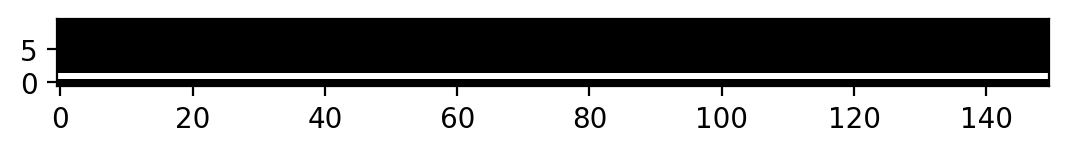

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(hdu_arcred[7].data, cmap='gray', origin='lower')

In [51]:
atlas_hgcd = Table.read(WD/'resources'/'hgcd.arc', format='ascii', names=['wavelength', 'intensity'], data_start=2)

In [52]:
atlas_hgcd

wavelength,intensity
float64,int64
3610.05,1
3612.873,1
3650.15,1
3654.8,1
4046.8,20
4358.2,50
4678.2,20
4799.9,30
4916.068,1


In [122]:
ii = 30
ww = hdu_arcred[4].data[ii]
ff = hdu_arcred[0].data[ii]

from scipy.interpolate import interp1d
from scipy.signal import find_peaks
from rascal import util

peaks, _ = find_peaks(ff, prominence=100)
print(peaks)
peaks_refined = util.refine_peaks(ff, peaks, window_width=5)
print(peaks_refined)

fi2w = interp1d(np.arange(len(ww)), ww)
ww_peaks = fi2w(peaks_refined)
print(ww_peaks)
nanmask = np.isfinite(ff)
fw2f = interp1d(ww[nanmask], ff[nanmask], kind='cubic')
ff_peaks = fw2f(ww_peaks)

[ 475  838  909  964 1050 1118 1127 1210 1217 1300 1362 1516 1556 1562
 1623 1631 1734 1833 1845 1912 2013]
[ 475.11513383  838.26205043  908.64308516  963.58186222 1050.14268676
 1118.4474544  1127.13430816 1209.71600482 1217.46888542 1300.28010386
 1361.6057214  1516.0829788  1556.20105204 1562.31282041 1623.39850083
 1631.43378778 1734.27106322 1833.42930049 1844.79040454 1911.52801481
 2012.54767503]
[643.85916492 696.51548046 706.72076235 714.68685941 727.23816063
 737.14240428 738.40198463 750.37631295 751.50052508 763.50808879
 772.40034143 794.79957017 800.61668089 801.50286551 810.36028064
 811.52543211 826.4367704  840.81476803 842.46209724 852.13907246
 866.78694311]


In [123]:
ff_peaks

array([ 8106.57777239,  5248.02301743,  4589.0502466 ,  2890.50737031,
        3459.27939749,  2850.35428932,  7222.20538067,  7047.14441258,
        7150.22766385, 21921.6112158 , 10952.10254426, 10553.0831206 ,
        7252.55961723, 10991.31324212, 15546.2114816 , 40663.24479495,
       11178.81190812, 17233.42002226, 20833.91013856,  8837.90164514,
        4210.64862285])

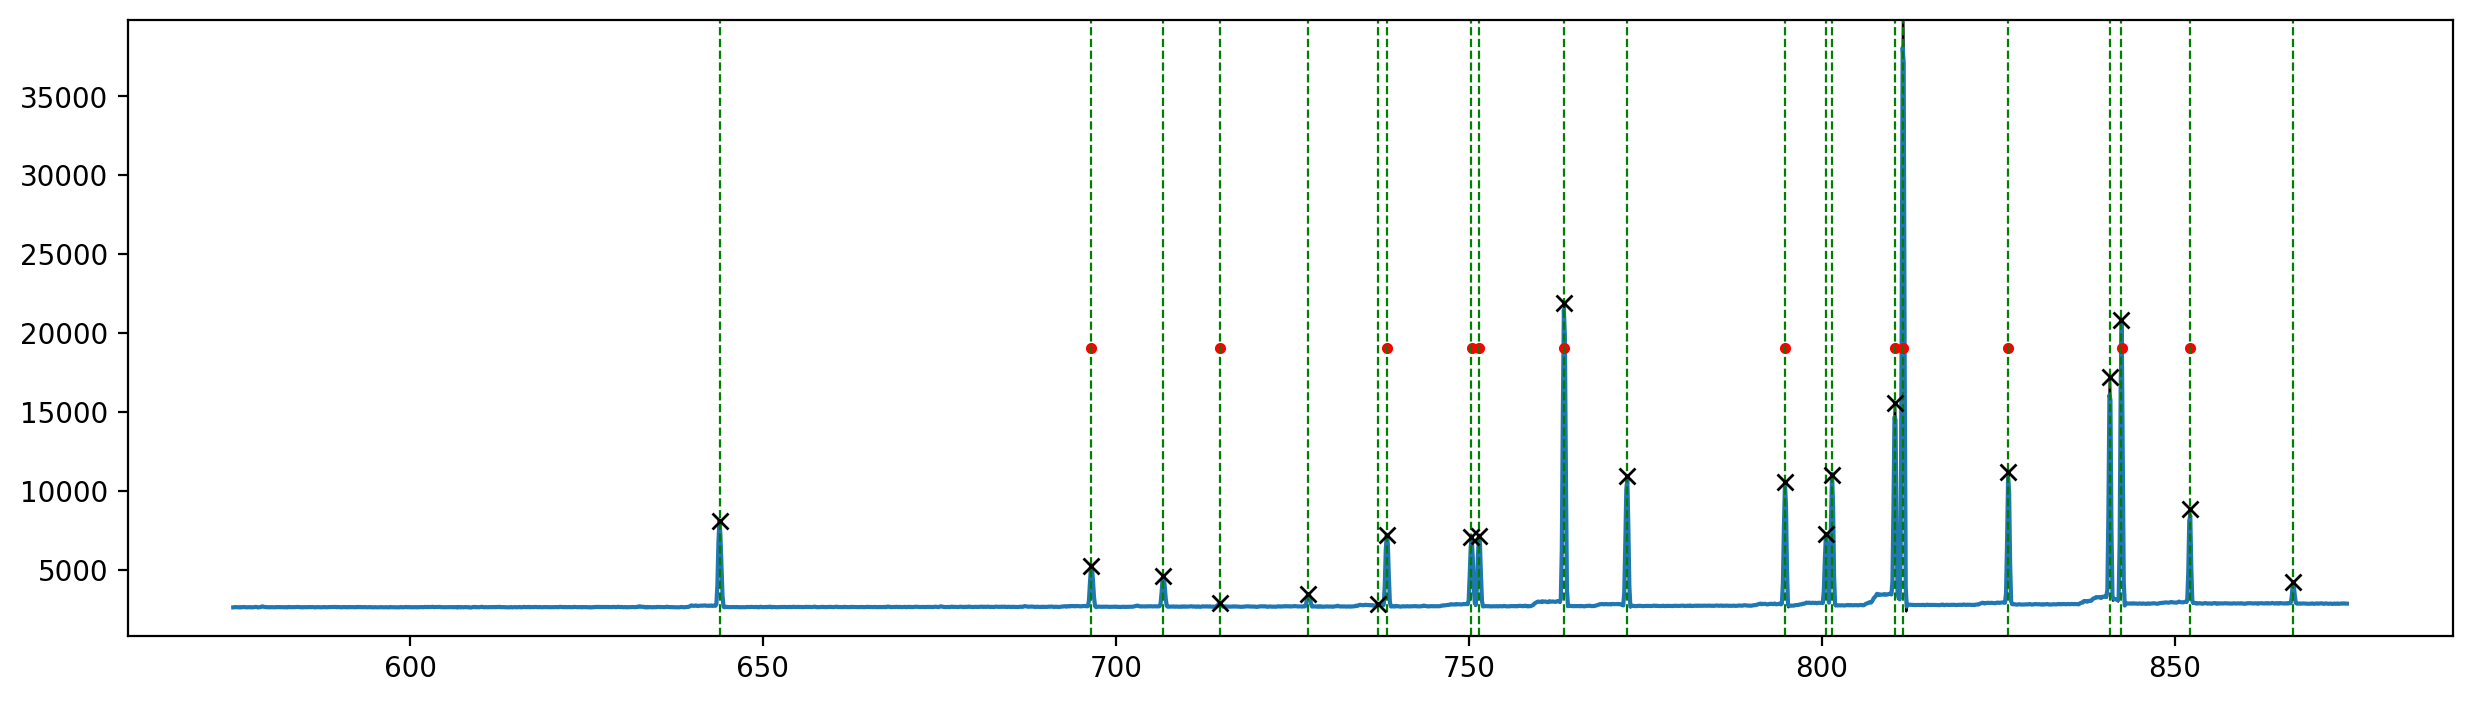

In [133]:
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(111)
ax.plot(ww, ff)
xlim, ylim = ax.get_xlim(), ax.get_ylim()
ax.plot(atlas_hgcd['wavelength']/10, atlas_hgcd['intensity']*0.5*np.nanmax(hdu_arcred[0].data[30]), '.r')
ax.set_ylim(ylim)
ax.set_xlim(xlim)
for wp in ww_peaks:
    ax.axvline(wp, c='g', ls='--', lw=0.8)
ax.plot(ww_peaks, ff_peaks, 'xk')
ww_fine = np.linspace(ww[0], ww[nanmask][-1], 30000)
ff_fine = fw2f(ww_fine)
ax.plot(ww_fine, ff_fine, 'k', lw=0.8, zorder=-1)
# ax.plot(atlas_hgcd['wavelength']/10, atlas_hgcd['intensity'], c='r')

In [178]:
# fiducial wavelength solution
wmin, wmax = ww[0], ww[-1] # nm
wmid = (wmin + wmax)/2
ymin, ymax = 0, nimg
ymid = (ymin + ymax)/2
dw_max = 1 # nm = 10A - maximum wavelength deviation from the linear solution

matrix = np.array([
    [ymin**2, ymin, 1],
    [ymax**2, ymax, 1],
    [ymid**2, ymid, 1]
])

coeffs = np.linalg.solve(matrix, [wmin, wmax, wmid])

def y2w(y):
    return coeffs[0]*y**2 + coeffs[1]*y + coeffs[2]

wtram_fiducial = y2w(ytram_fiducial) - dispersion_shifts
ztram_fiducial = np.zeros_like(wtram_fiducial)
img_arc = np.zeros((nimg, nimg))

for wp, fp in zip(ww_peaks, ff_peaks):
    ztram_fiducial[np.arange(NFIBERS),np.argmin(np.abs(wtram_fiducial-wp), axis=1)] = fp

fiber_mult_ztram = fiber_throughputs * ztram_fiducial  # Element-wise multiplication

# Use advanced indexing to add the calculated values directly to img
np.add.at(img_arc, (np.arange(nimg)[np.newaxis,:], xtram_indices), fiber_mult_ztram)

In [182]:
from scipy.ndimage import gaussian_filter
img_arc_smooth = gaussian_filter(img_arc, fiberstep/2*nmul/(2*np.sqrt(2*np.log(2))))

In [185]:
from skimage.measure import block_reduce
img_arc_downsample = block_reduce(img_arc_smooth, (nmul, nmul), np.sum)/2

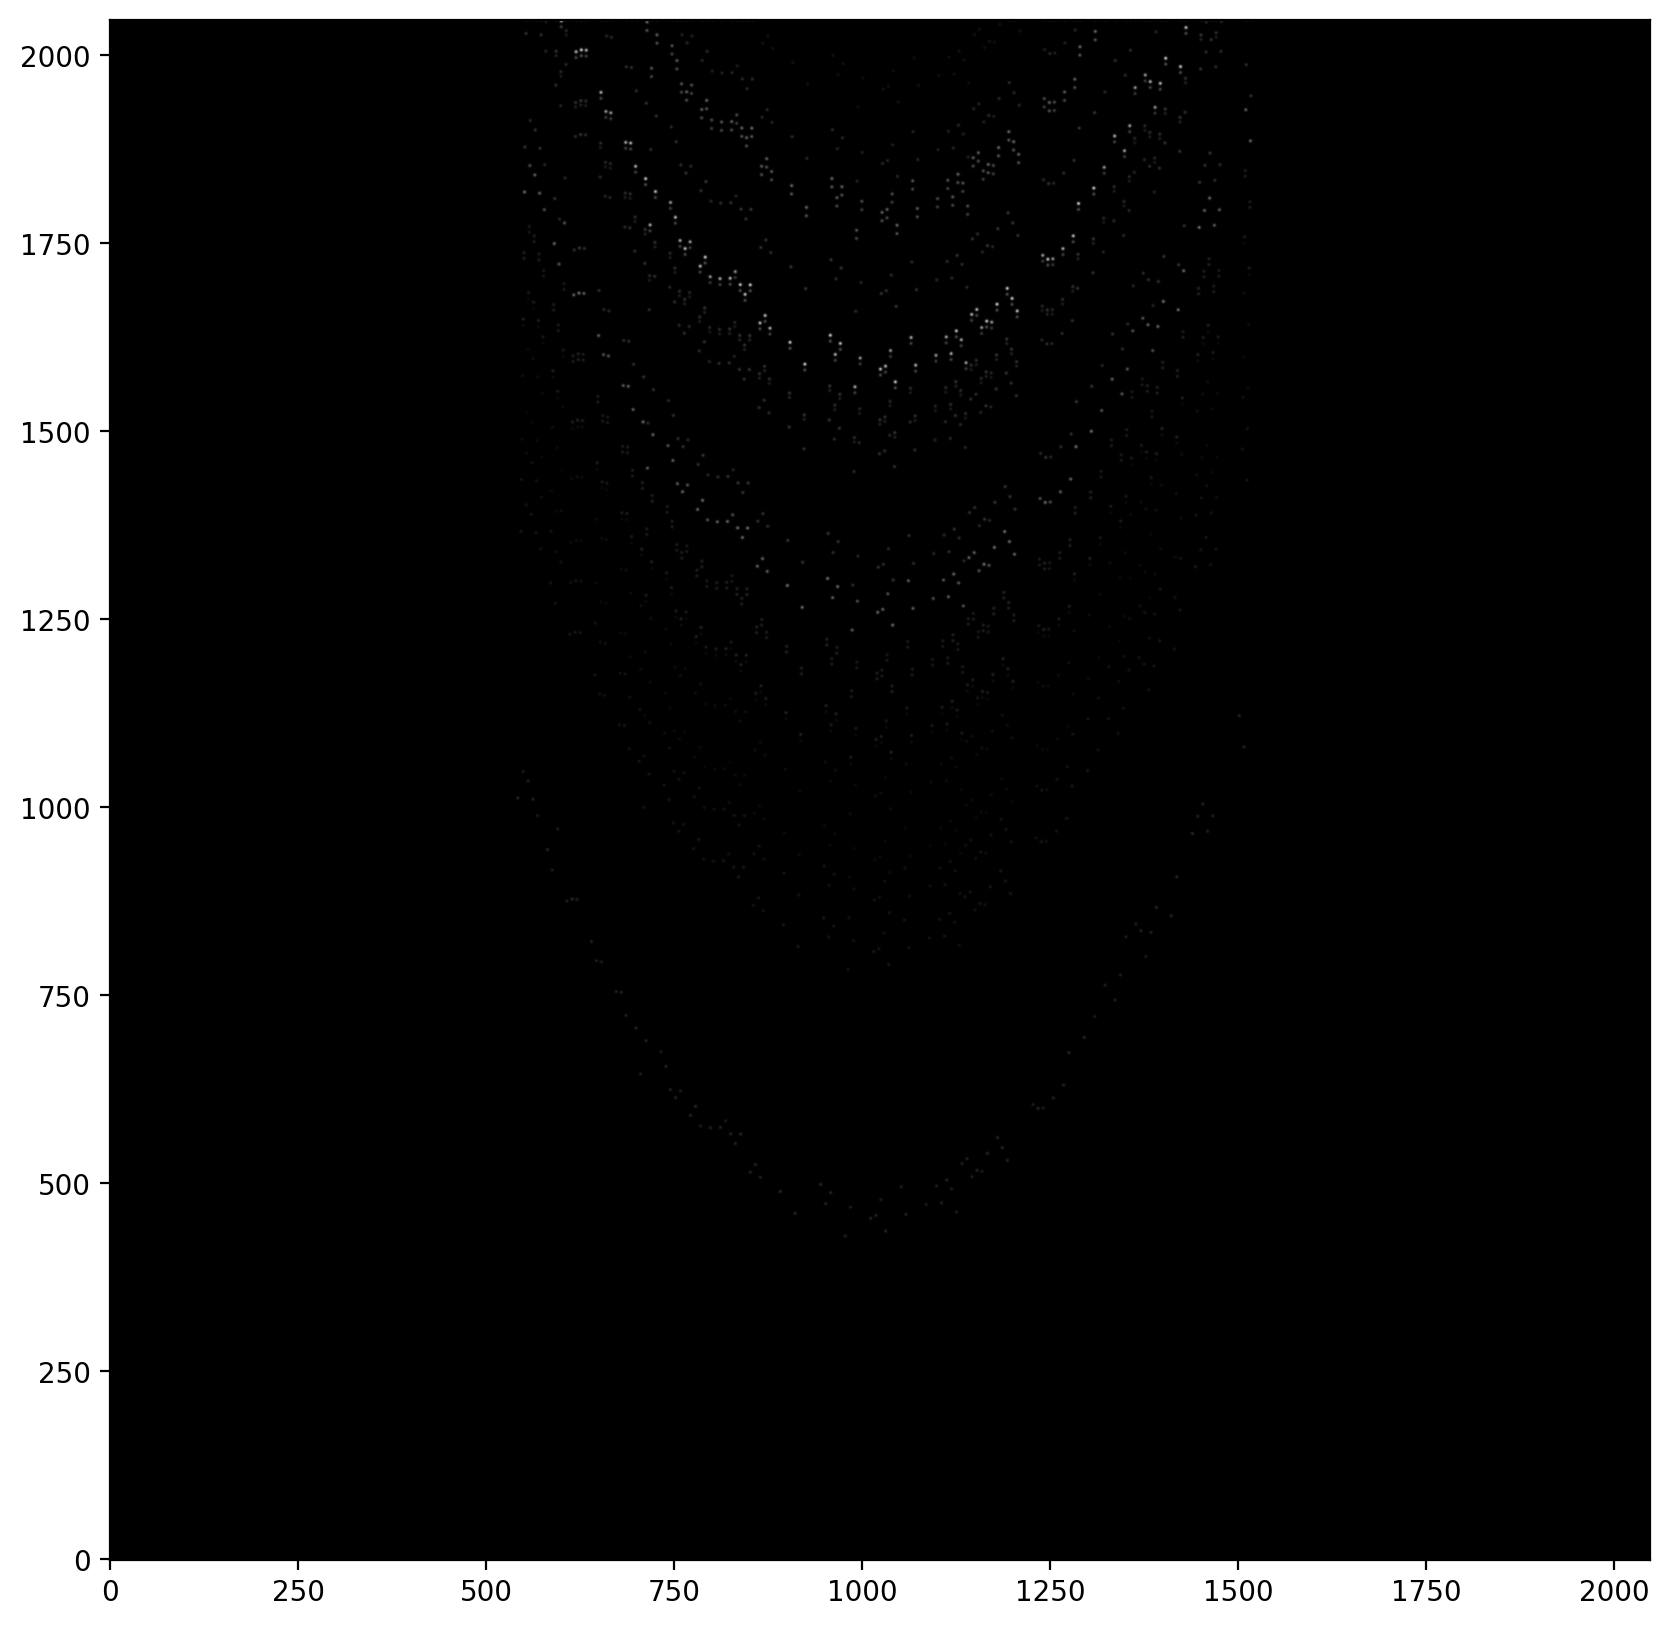

In [186]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
ax.imshow(img_arc_downsample, cmap='gray', origin='lower')

In [170]:
np.argmin(np.abs(wtram_fiducial-wp), axis=1)

array([2577, 2636, 2585, 2558, 2584, 2515, 2550, 2537, 2513, 2491, 2469,
       2446, 2419, 2474, 2402, 2378, 2380, 2380, 2375, 2336, 2324, 2298,
       2297, 2307, 2276, 2257, 2256, 2226, 2186, 2209, 2148, 2192, 2195,
       2197, 2178, 2158, 2127, 2116, 2125, 2103, 2093, 2105, 2079, 2051,
       2076, 2054, 2077, 2086, 2068, 2055, 2068, 2015, 2017, 2027, 2010,
       2016, 2001, 1999, 1991, 2011, 1989, 1963, 1983, 1970, 2009, 1985,
       2001, 1975, 1990, 1985, 1980, 1932, 1971, 1993, 1966, 1989, 1956,
       1960, 1981, 1939, 2002, 1964, 1998, 1961, 1990, 1969, 1949, 1974,
       1983, 1999, 1977, 2007, 1995, 1964, 2029, 2035, 2011, 2020, 2018,
       2042, 2028, 2063, 2050, 2033, 2080, 2083, 2043, 2092, 2107, 2102,
       2103, 2146, 2116, 2174, 2133, 2176, 2203, 2151, 2197, 2183, 2224,
       2248, 2266, 2262, 2246, 2279, 2330, 2315, 2347, 2338, 2304, 2336,
       2369, 2350, 2397, 2358, 2410, 2438, 2404, 2468, 2490, 2507, 2471,
       2491, 2560, 2576, 2549, 2560, 2624, 2583])

In [177]:
wtram_fiducial[np.arange(150),np.argmin(np.abs(wtram_fiducial-wp), axis=1)]

array([866.81113977, 866.7156812 , 866.80955289, 866.77197638,
       866.77450367, 866.80592479, 866.78669177, 866.71431803,
       866.75834232, 866.73574086, 866.76351275, 866.75694796,
       866.80055997, 866.83693968, 866.77337022, 866.79777238,
       866.71963431, 866.78714413, 866.75966921, 866.72462882,
       866.8031365 , 866.71332717, 866.83190175, 866.81908079,
       866.82992868, 866.71943532, 866.71670745, 866.84510811,
       866.72179689, 866.77806506, 866.8459379 , 866.7876759 ,
       866.75176786, 866.83178468, 866.85942232, 866.81085572,
       866.79860544, 866.75376758, 866.75690597, 866.7534269 ,
       866.82237665, 866.81021044, 866.83022861, 866.72387497,
       866.76024224, 866.7723222 , 866.83433656, 866.85464173,
       866.76191429, 866.74469797, 866.7939051 , 866.83550315,
       866.75509966, 866.75370281, 866.7377194 , 866.73487191,
       866.7710224 , 866.78426427, 866.71397787, 866.75602193,
       866.83131206, 866.85953981, 866.74304226, 866.71

In [165]:
wtram_fiducial

array([[ 484.20583285,  484.35430212,  484.50277139, ..., 3524.41105981,
        3524.55952908, 3524.70799835],
       [ 475.35068739,  475.49915666,  475.64762593, ..., 3515.55591435,
        3515.70438362, 3515.85285289],
       [ 483.01649181,  483.16496108,  483.31343035, ..., 3523.22171877,
        3523.37018804, 3523.51865731],
       ...,
       [ 486.63950381,  486.78797308,  486.93644235, ..., 3526.84473077,
        3526.99320004, 3527.14166931],
       [ 477.16853201,  477.31700128,  477.46547055, ..., 3517.37375897,
        3517.52222823, 3517.6706975 ],
       [ 483.32061437,  483.46908364,  483.61755291, ..., 3523.52584133,
        3523.6743106 , 3523.82277987]])